In [1]:
## Importing necessary libraries and data

In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
    
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

## Data Overview

-   Observations
-   Sanity checks

In [3]:
# loading the dataset
df = pd.read_csv("used_phone_data.csv")

In [4]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


### Observations

-   There are 3571 rows and 15 columns.
-   Dependent variable is used_price.


In [6]:
df.shape

(3571, 15)

-   The dataset has 3571 rows and 15 columns.

In [7]:
df.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
count,3571.000000,3391.000000,3569.000000,3561.000000,3561.000000,3565.000000,3564.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,14.803892,9.400454,6.547352,54.532607,4.056962,3067.225666,179.424285,2015.964996,675.391487,237.389037,109.880277
std,5.153092,4.818396,6.879359,84.696246,1.391844,1364.206665,90.280856,2.291784,248.640972,197.545581,121.501226
min,2.700000,0.080000,0.300000,0.005000,0.030000,80.000000,23.000000,2013.000000,91.000000,9.130000,2.510000
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,140.000000,2014.000000,536.000000,120.130000,45.205000
50%,13.490000,8.000000,5.000000,32.000000,4.000000,3000.000000,159.000000,2016.000000,690.000000,189.800000,75.530000
75%,16.510000,13.000000,8.000000,64.000000,4.000000,4000.000000,184.000000,2018.000000,872.000000,291.935000,126.000000
max,46.360000,48.000000,32.000000,1024.000000,16.000000,12000.000000,950.000000,2020.000000,1094.000000,2560.200000,1916.540000


In [8]:
## Exploratory Data Analysis (EDA)

In [9]:
# let's create a copy of the data to avoid any changes to original data
df2 = df.copy()

In [10]:
# checking for missing values
df2.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

-   Let's fix the missing values.

-   For the variables -
    main_camera_mp,selfie_camera_mp,int_memory,ram,battery and weight we
    will replace the missing values in each column with its median.

In [11]:
medianFiller = lambda x: x.fillna(x.median())

numeric_columns = df2.select_dtypes(include=np.number).columns.tolist()

df2[numeric_columns] = df2[numeric_columns].apply(medianFiller, axis=0)


In [12]:
# checking the number of missing values
df2.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

-   All the missing values have been treated.

In [13]:
df2.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3571,34,Others,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3571,4,Android,3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3571.0,NaN,NaN,NaN,14.803892,5.153092,2.7,12.7,13.49,16.51,46.36
4g,3571,2,yes,2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3571,2,no,3419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3571.0,NaN,NaN,NaN,9.329863,4.705341,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3571.0,NaN,NaN,NaN,6.546486,6.877529,0.3,2.0,5.0,8.0,32.0
int_memory,3571.0,NaN,NaN,NaN,54.469509,84.585924,0.005,16.0,32.0,64.0,1024.0
ram,3571.0,NaN,NaN,NaN,4.056802,1.389897,0.03,4.0,4.0,4.0,16.0
battery,3571.0,NaN,NaN,NaN,3067.112714,1363.062572,80.0,2100.0,3000.0,4000.0,12000.0


### Observations

-   The 4g and 5g column has 2 unique values - "yes" and "no"
-   The release year column ranges from 2013 to 2020
-   The average price of a used phone is \~110 dollars.


In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

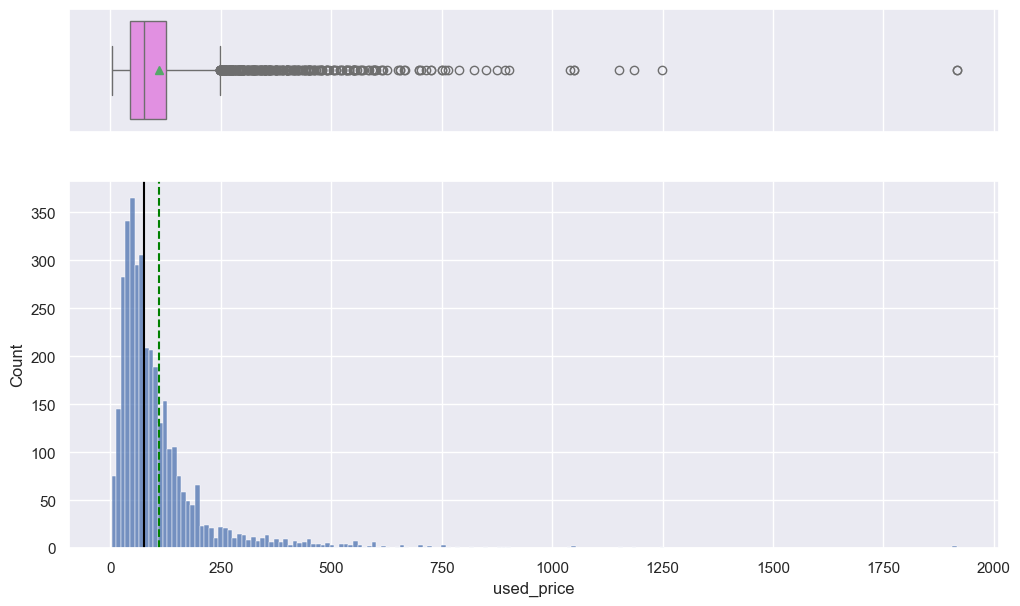

In [15]:
histogram_boxplot(df2, "used_price")

### Observations

-   The median used price is \~100 dollars.
-   There are a couple of outliers where the price of a used phone
    exceeds 250 dollars.
-   The distribution is right-skewed which is expected since there are
    couple of outliers greatly exceeding the mean.


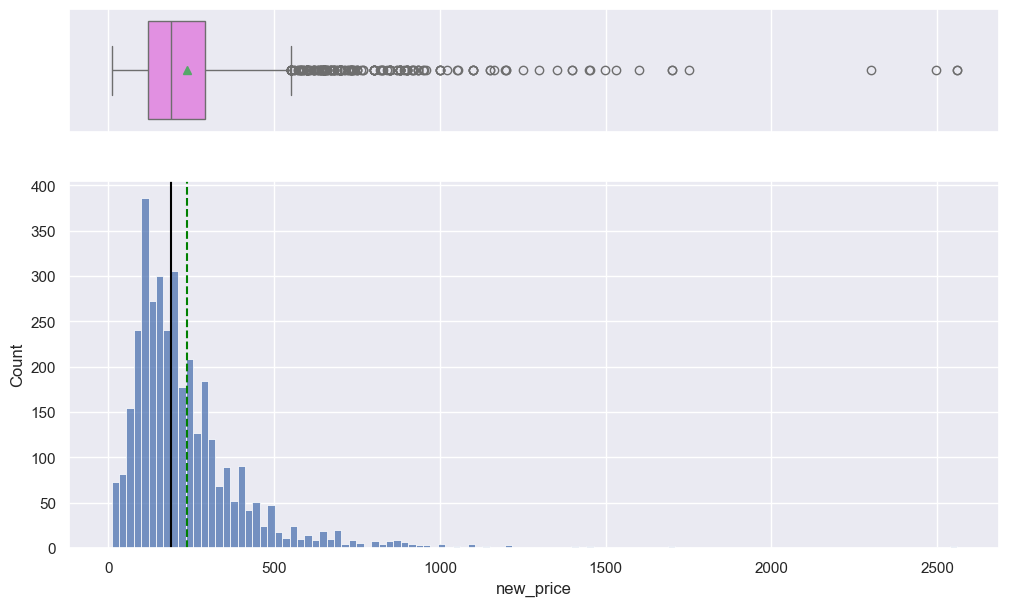

In [16]:
histogram_boxplot(df, "new_price")

### Observations

-   The median new price is ~200 dollars.
-   There are a couple of outliers where the price of a used phone
    exceeds 500 dollars.
-   The distribution is right-skewed which is expected since there are
    couple of outliers greatly exceeding the mean.
-   The distribution of the new price follows that of the used price.


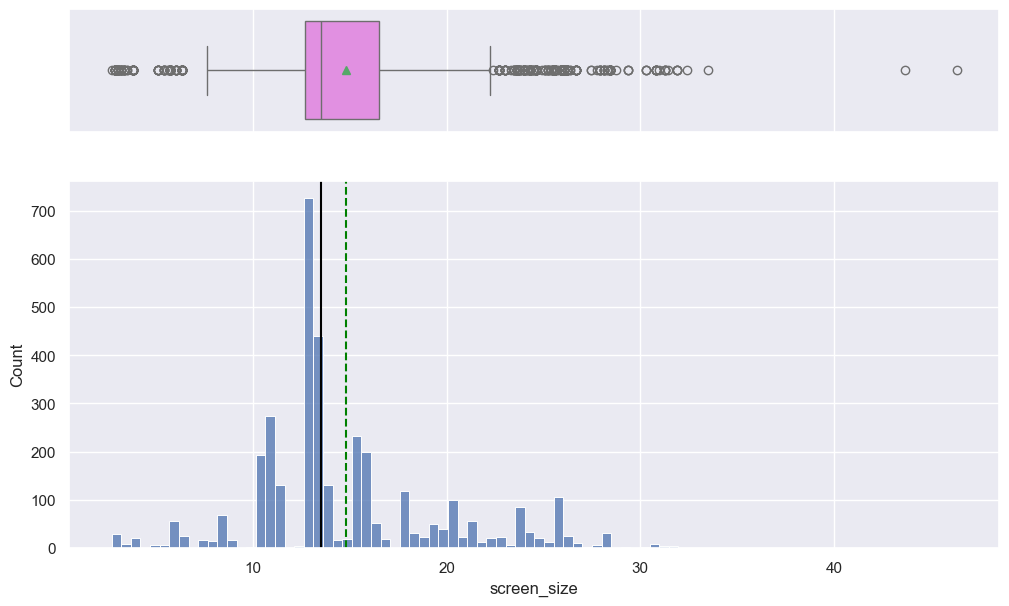

In [17]:
histogram_boxplot(df, "screen_size")

### Observations

-   The median screen size is \~15 cm.
-   There are a couple of outliers to both sides of the distribution.

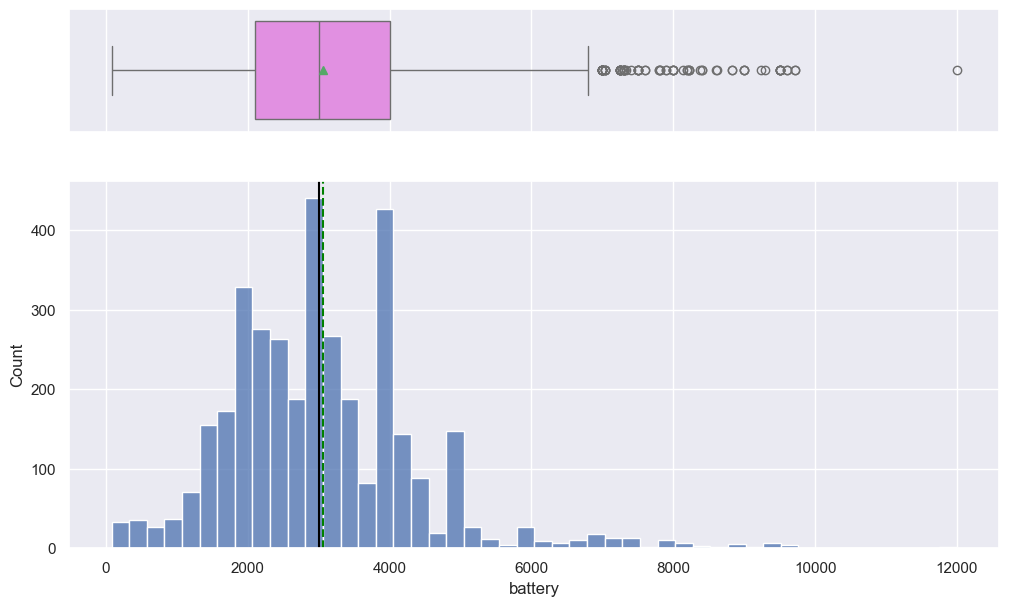

In [18]:
histogram_boxplot(df, "battery")

### Observations

-   The median battery capacity is \~3000 mAh.
-   There are a couple of outliers battery capacity exceeds \~6500 mAh.
-   The distribution is skewed slightly to the right indicating a couple
    of values significantly greater than the mean of the distribution.


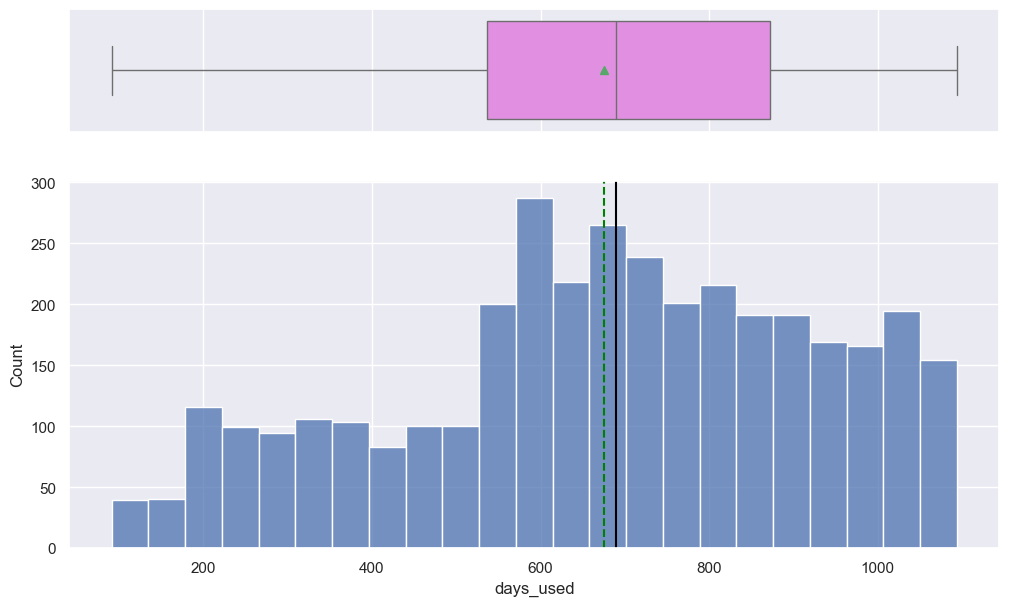

In [19]:
histogram_boxplot(df, "days_used")

### Observations

-   The median number of days a phone was used was \~700 days.
-   There are no outliers in this distribution.
-   The distribution is skewed slightly to the left. indicating a couple
    of values slightly lower than the mean of the distribution.

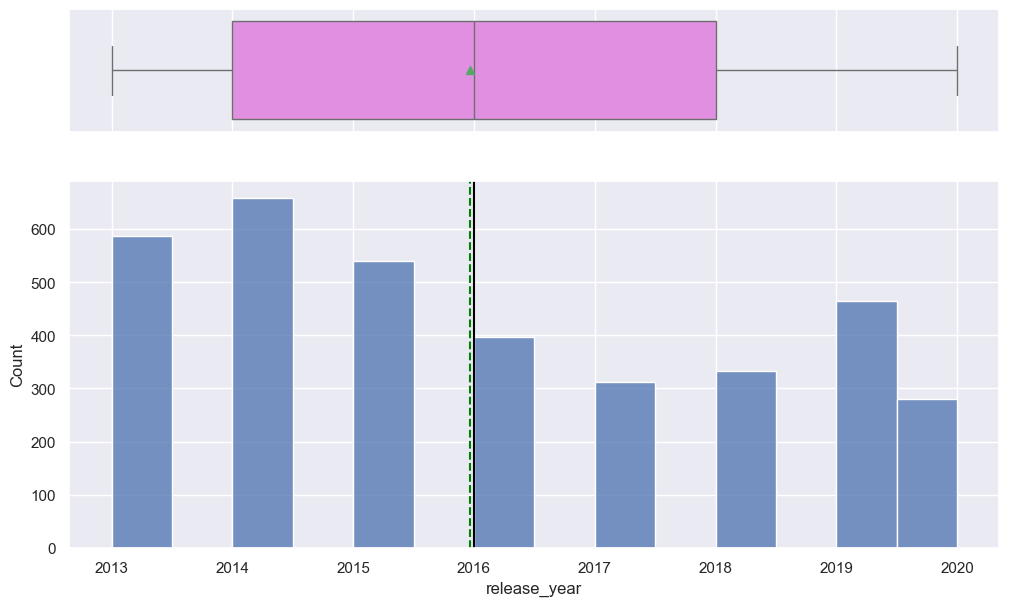

In [20]:
histogram_boxplot(df, "release_year")

### Observations

-   The median release year of resold phones is 2016
-   The distribution is skewed slightly to the right reflection that
    newer versions of phones are maybe more likely to be resold.

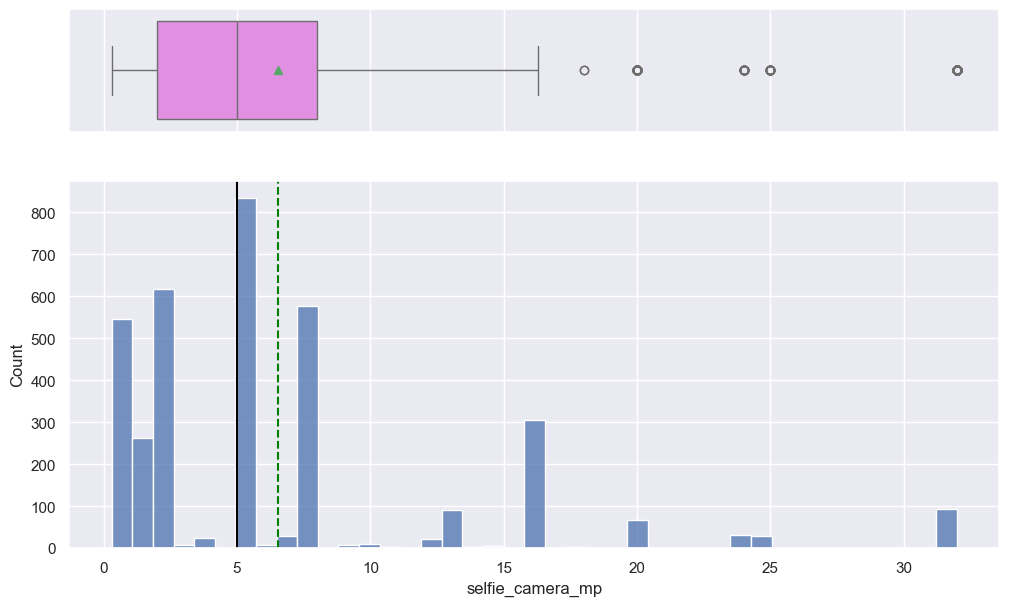

In [21]:
histogram_boxplot(df, "selfie_camera_mp")

### Observations

-   The median resolution of the selfie camera is 5 MP
-   There are a couple of outliers whose resolution exceed the mean.
-   The distribution is skewed heavily to the right.

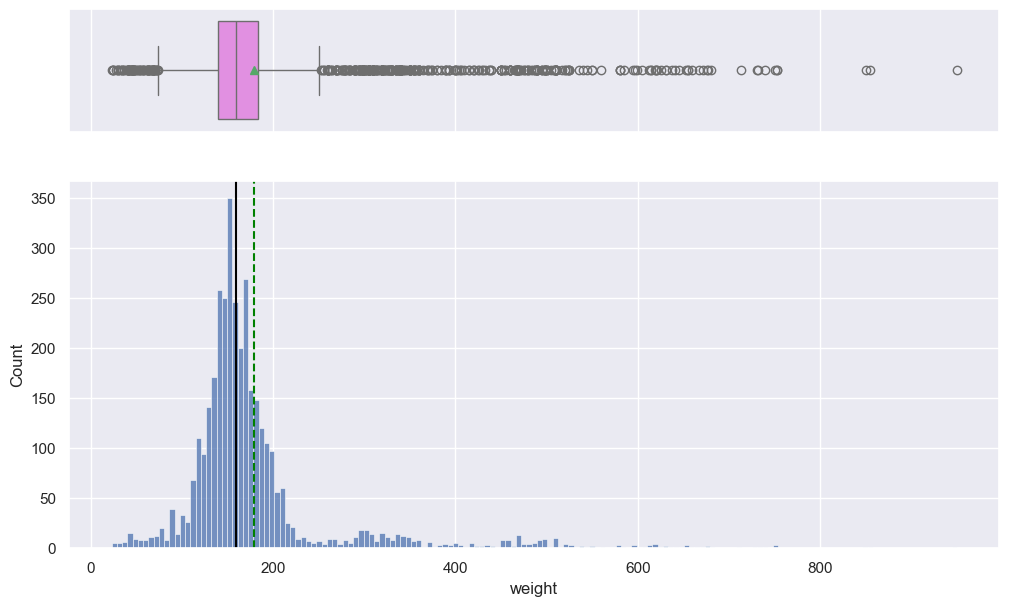

In [22]:
histogram_boxplot(df, "weight")

### Observations

-   The median weight of a phone is \~180 grams.
-   There are a couple of outliers on both sides of the distribution.
-   The distribution is skewed to the right.


## Additional Observations

-   The distribution of used phone prices is heavily skewed to the right
    with one prominent peak.

In [23]:
print ('The percentage of the phone market dominated by Android devices is', (len((df2[(df2['os']=='Android')]))/(len(df2))) * 100)

The percentage of the phone market dominated by Android devices is 90.89890786894428


### RAM by Brand

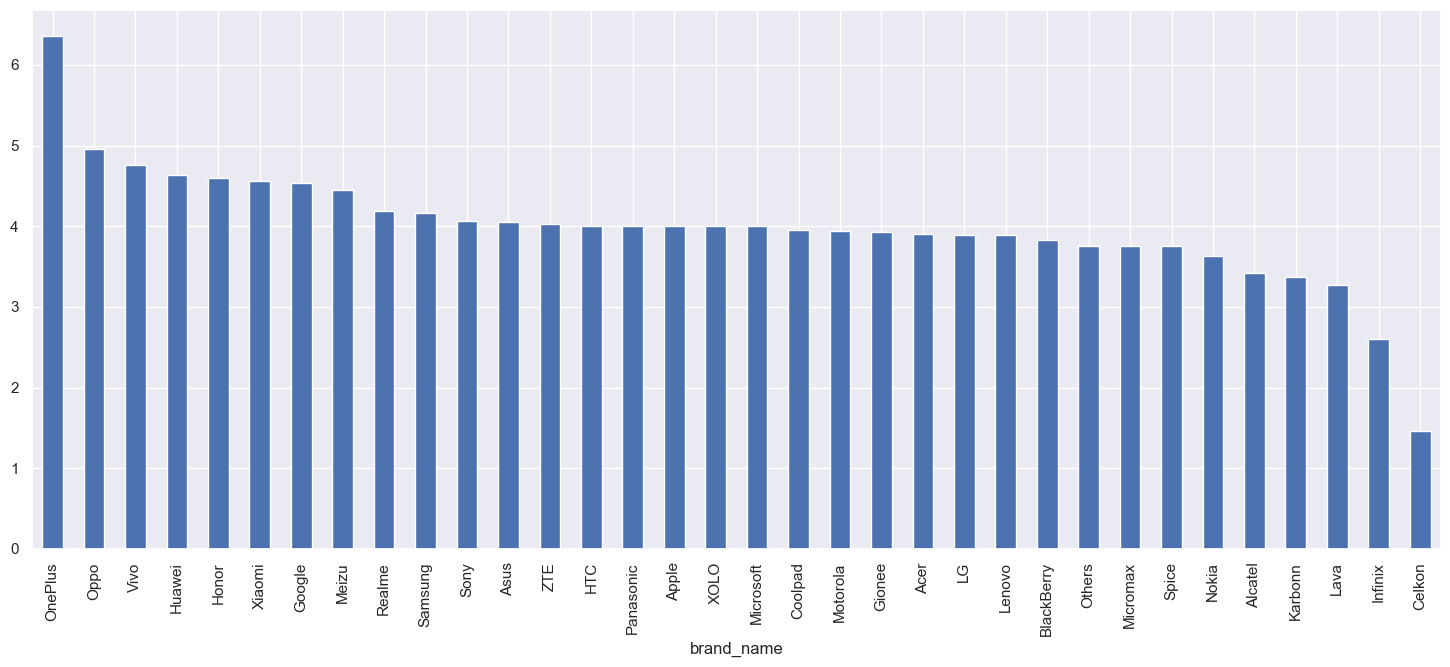

In [24]:
b = df2.groupby(['brand_name'])['ram'].mean().sort_values(ascending = False)

f = plt.figure(figsize=(40,7))
ax = f.add_subplot(121)
ax = b.plot.bar(x=b[0], y=b[1], rot=0)
ax.tick_params(axis='x',rotation = 90)


-   One Plus has the largest RAM capacity on average with 6 Gb followed
    by Oppo with 5. Most of the phone brands offer 4Gb RAM on average.
    Celkon offers the least RAM storage on average with ~1.5 Gb.

### Relationship between Battery and Weight

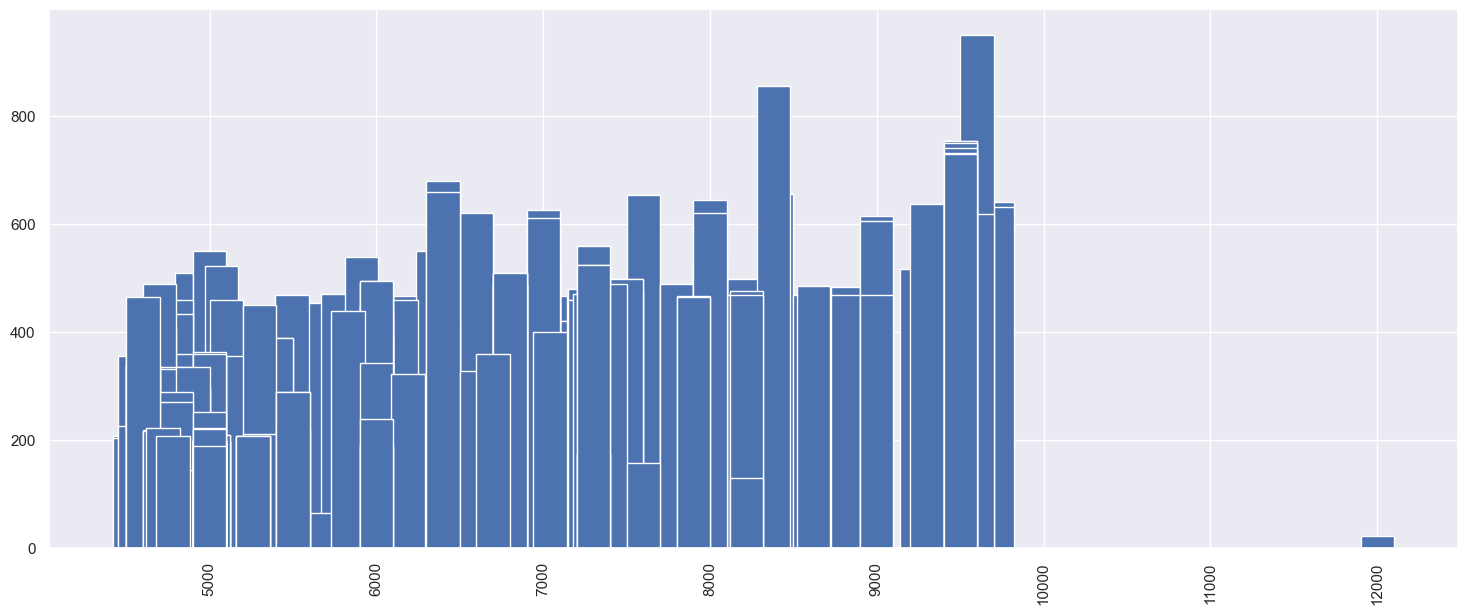

In [25]:
df3  = df2[(df2['battery']>4500)][['battery','weight']]

f = plt.figure(figsize=(40,7))
ax = f.add_subplot(121)
ax.bar(x=df3['battery'], height=df3['weight'],width = 200)
ax.tick_params(axis='x',rotation = 90)

-   From the bar chart above it can be seen that with an increase in
    battery size there is a trend for the weight of the phones to
    increase as well. There is one outlier but this is either an
    exception or an error in values.

### Correlations with Used Phone Price

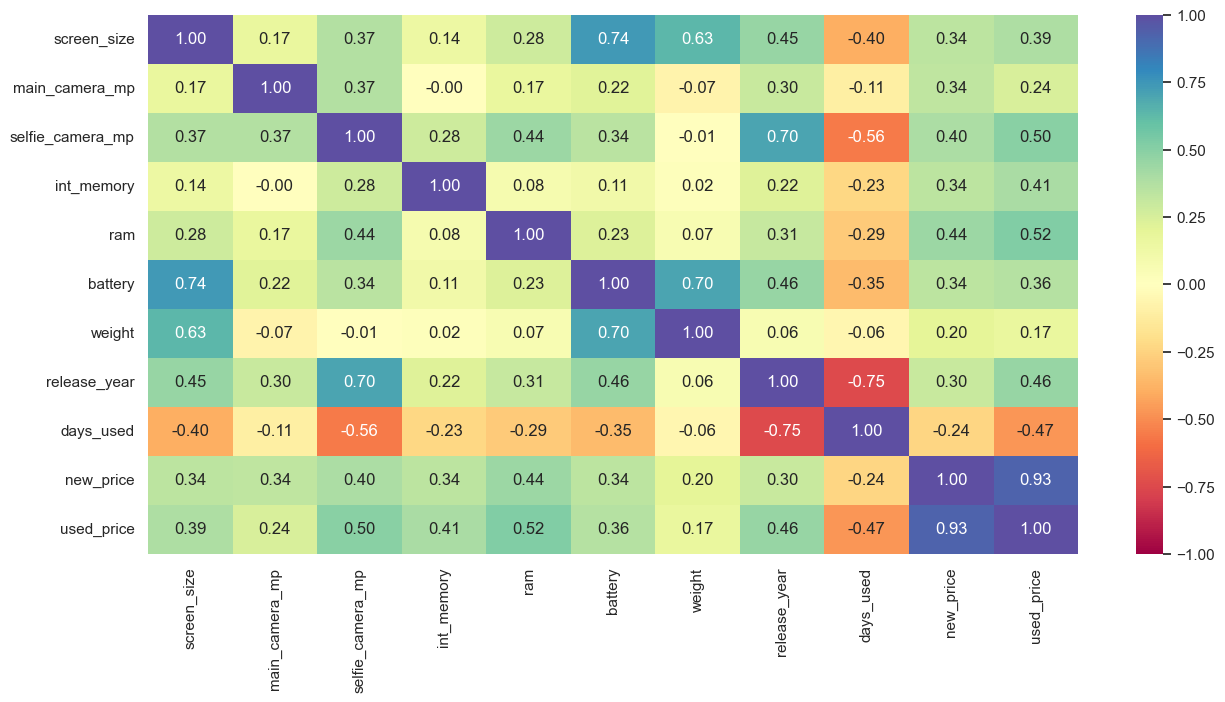

In [26]:
numeric_columns = df2.select_dtypes(include=np.number).columns.tolist()

# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df2[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

-   From the correlation heatmap it can be seen that new price, ram,
    selfie camera and release year are significantly correlated with
    determining the used price.
-   Release year is also strongly negatively correlated with used price.

In [27]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

C:\Users\iremo\AppData\Local\Temp\ipykernel_39020\2559097902.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


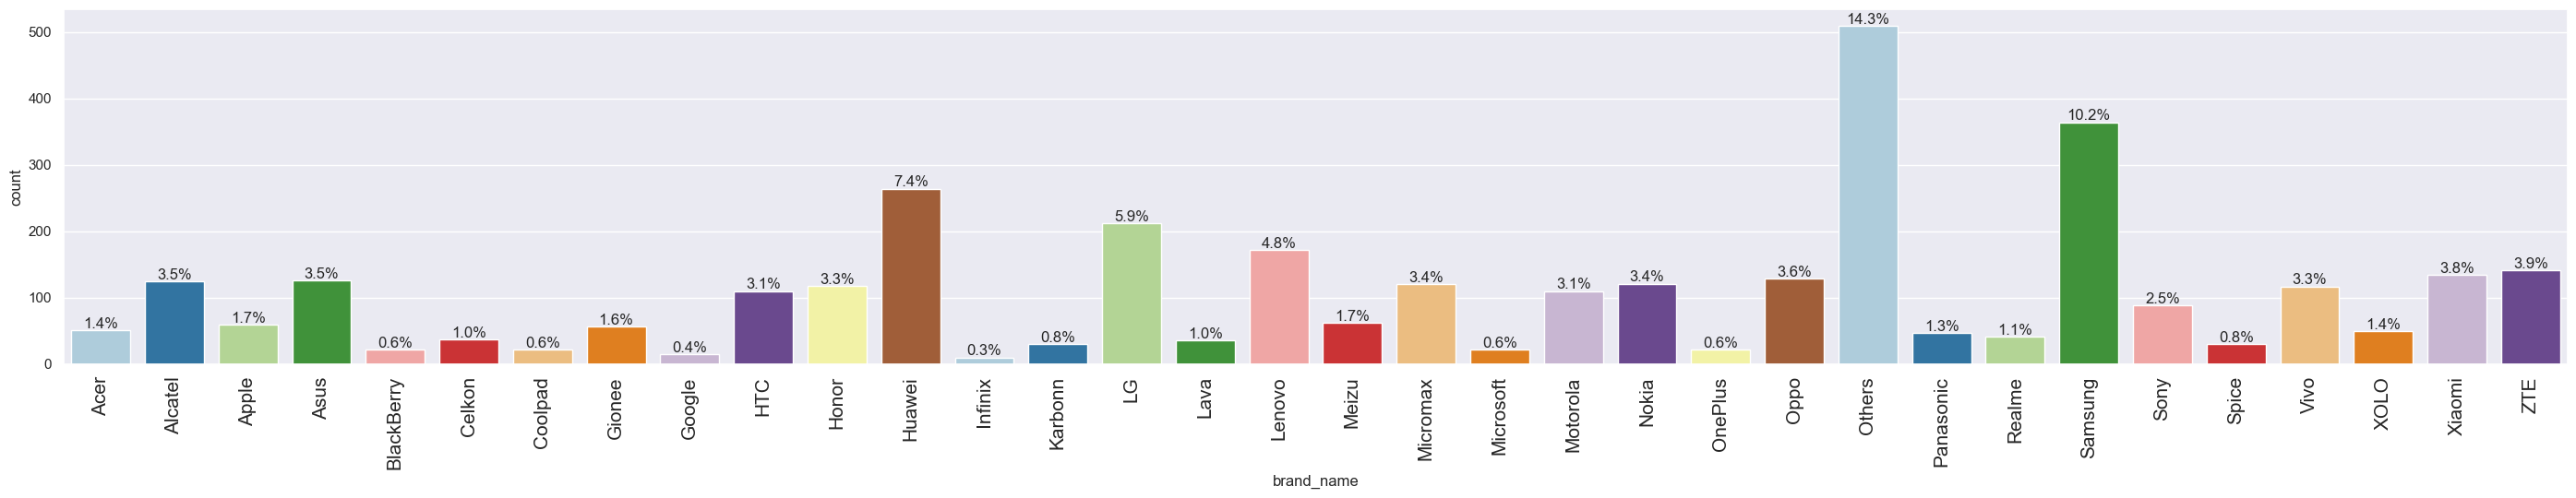

In [28]:
labeled_barplot(df, "brand_name", perc=True)

-   From the bar chart among the named brands, it can be seen that
    Samsung and Huawei are the brands with most most phones.
-   From the barchart Android OS dominates the market with 90.9% of the
    total phones in the dataset.

C:\Users\iremo\AppData\Local\Temp\ipykernel_39020\2559097902.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


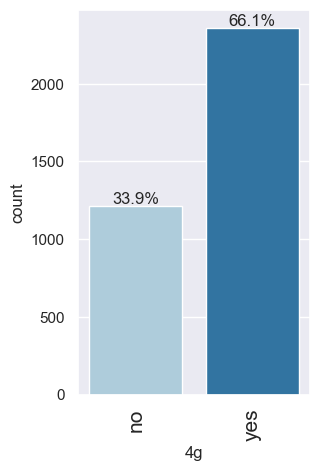

In [29]:
labeled_barplot(df, "4g", perc=True)

-   Majority of the phones for sale have 4g capability at 66.1%.

C:\Users\iremo\AppData\Local\Temp\ipykernel_39020\2559097902.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


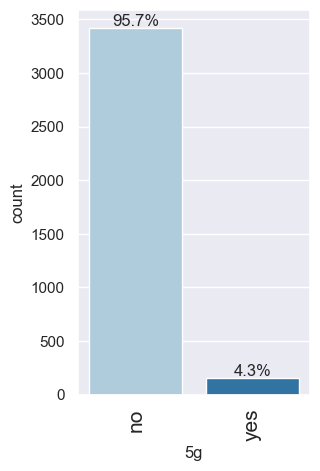

In [30]:
labeled_barplot(df, "5g", perc=True)

-   Only about 4.3% of used phones in the dataset have 5g capability.

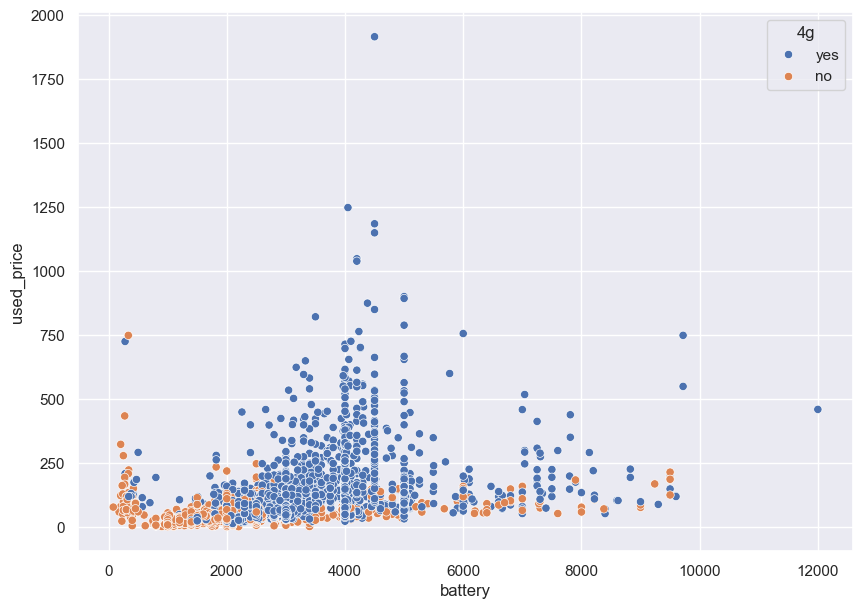

In [31]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="used_price", x="battery", hue="4g", data=df)
plt.show()

- Phones with bigger battery capacity and 4g capability generally sell for higher prices than ones without.

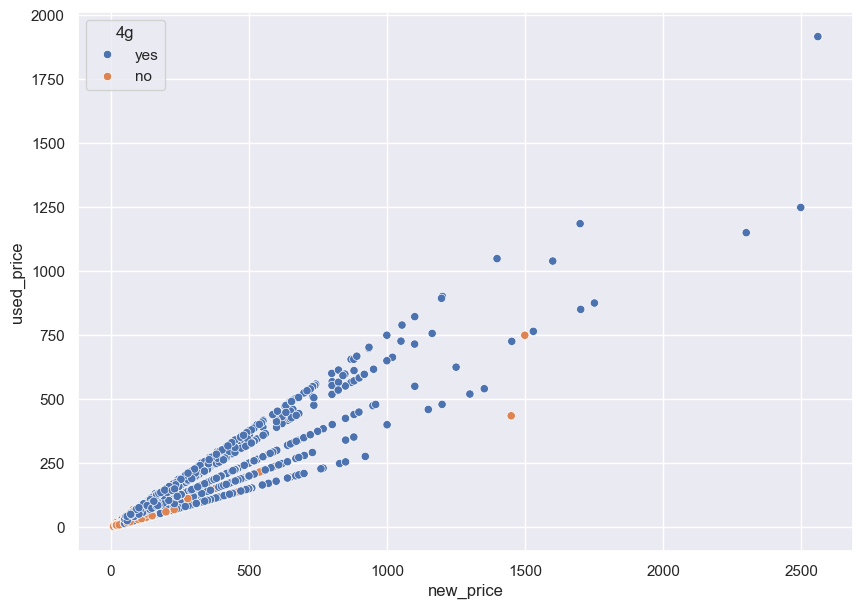

In [32]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="used_price", x="new_price", hue="4g", data=df)
plt.show()


-   The price of a used has a strong postive correlation with its price
    when it was new.

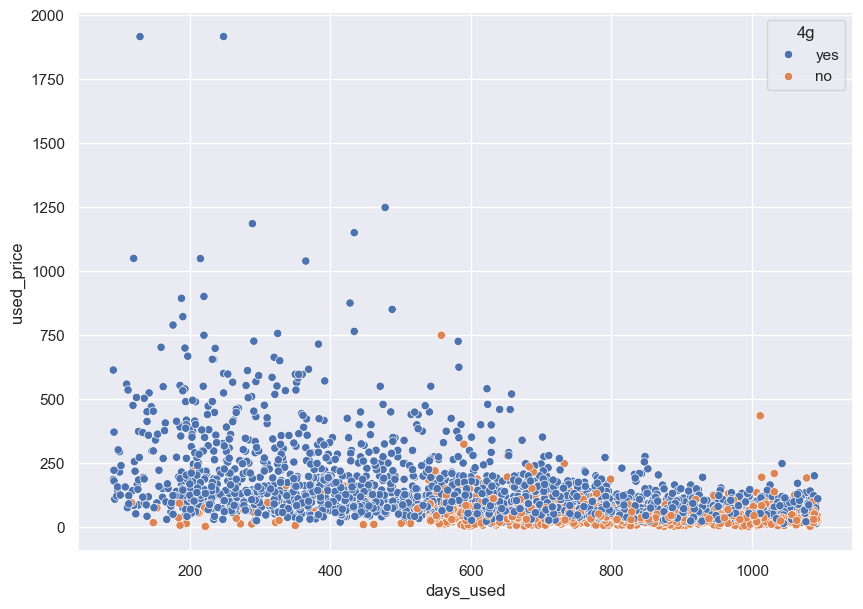

In [33]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="used_price", x="days_used", hue="4g", data=df)
plt.show()

-   Phones which have been used for less number of days tend to sell for
    a higher price. The trend also continues with phones with 4g
    capability selling for a higher price.


C:\Users\iremo\AppData\Local\Temp\ipykernel_39020\1389619738.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="release_year", y="used_price", data=df, ci=None)


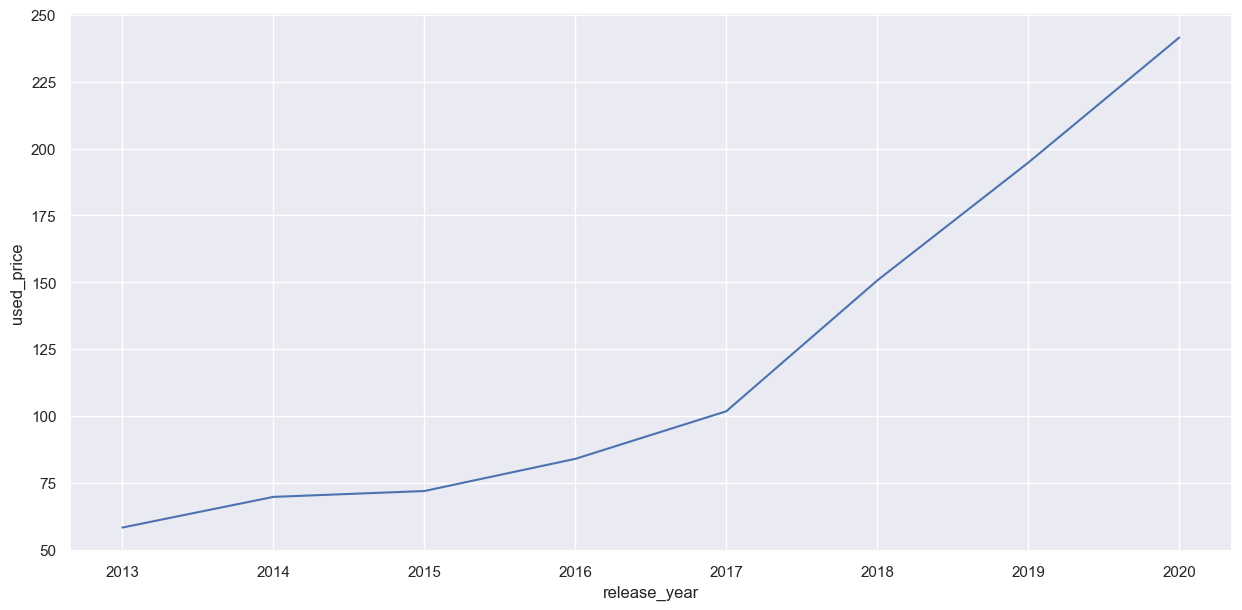

In [34]:
# average life expectancy over the years
plt.figure(figsize=(15, 7))
sns.lineplot(x="release_year", y="used_price", data=df, ci=None)
plt.show()

-   The more recent the release year of the phone, the more expensive it
    resale price is.

C:\Users\iremo\AppData\Local\Temp\ipykernel_39020\1589215417.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="ram", y="used_price", data=df, ci=None)


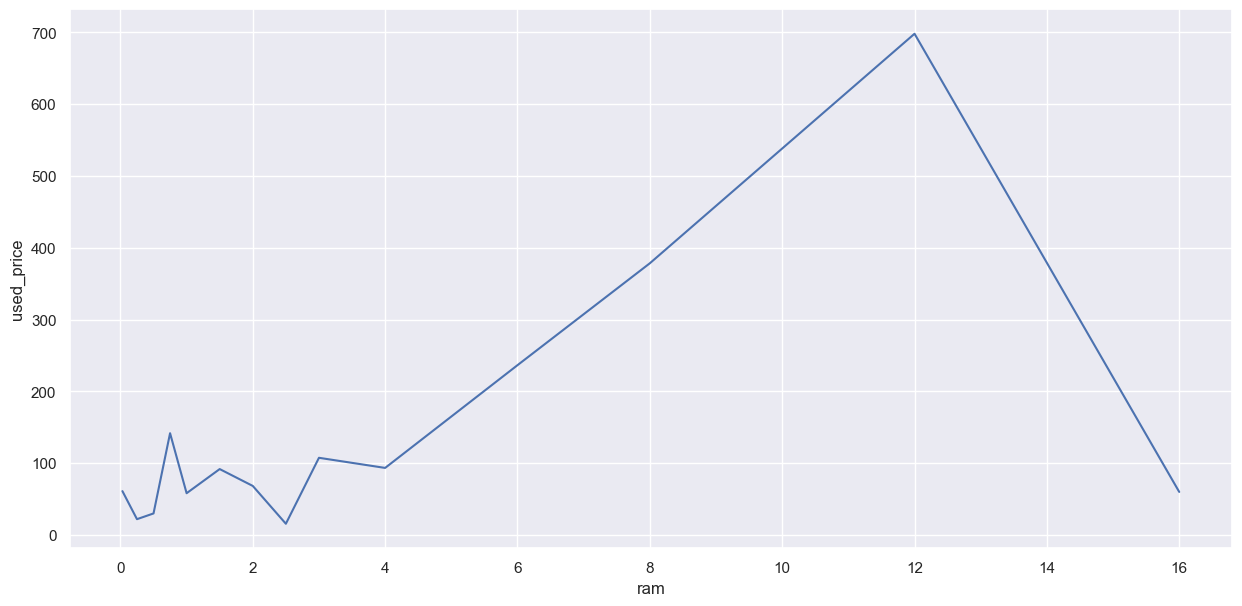

In [35]:
# average life expectancy over the years
plt.figure(figsize=(15, 7))
sns.lineplot(x="ram", y="used_price", data=df, ci=None)
plt.show()

-   The price tends to increase with the quality of the selfie camera on
    average.

## Data Preprocessing

-   Missing value treatment
-   Feature engineering (if needed)
-   Outlier detection and treatment (if needed)
-   Preparing data for modeling
-   Any other preprocessing steps (if needed)

**Let's convert the *object* type columns to *category* type**

In [36]:
df["brand_name"] = df["brand_name"].astype("category")
df["os"] = df["os"].astype("category")
df["4g"] = df["4g"].astype("category")
df["5g"] = df["5g"].astype("category")

### Outlier Detection

-   Let's look at outliers in every numerical column


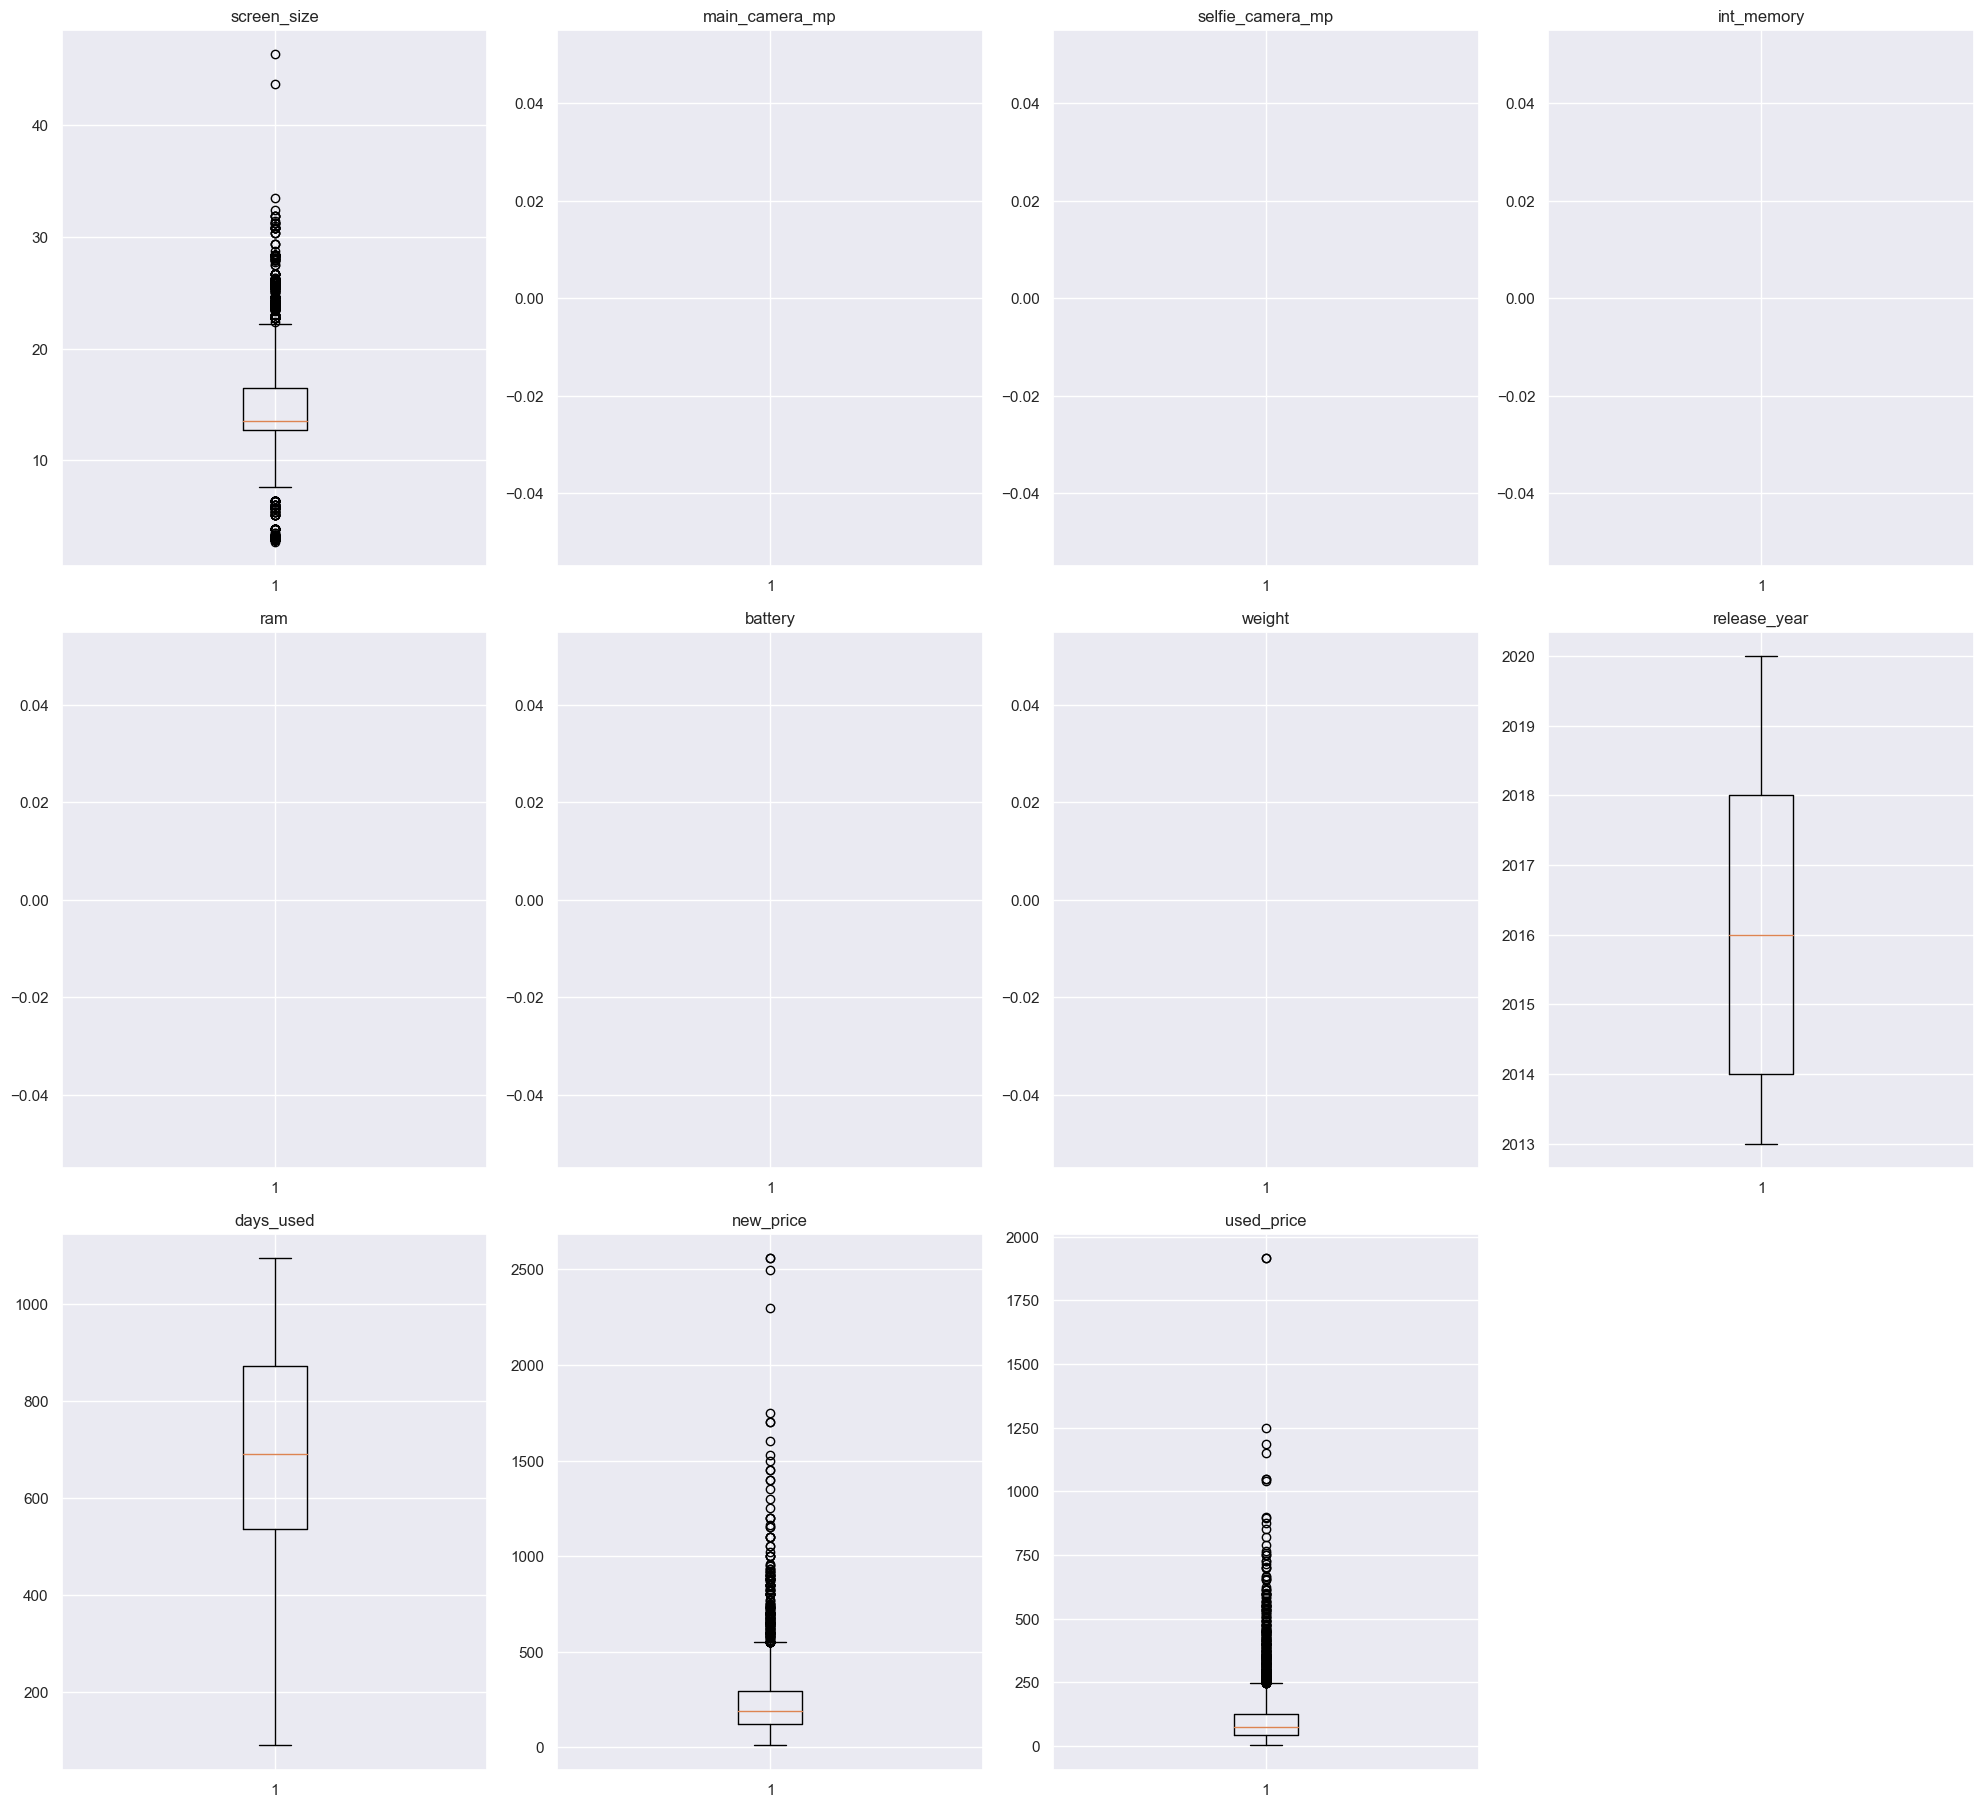

In [37]:
# let's plot the boxplots of all columns to check for outliers

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**

-   There are higher outliers in *new price*, *used price and* screen
    size\*

-   There are no outliers in *days used* and *release year*.

-   *Screen size* has both upper and lower outliers.

-   We will treat these outliers as these might adversely affect the
    predictive power of linear model. However, in real life, these
    outliers may be due to non-linear pattern in the data or can be
    important information.

-   Sometimes outliers in the independent variable can adversely impact
    the linear model. This can be checked by building the model with and
    without outliers and comparing the model performances.

### Outlier Treatment

-   Let's treat outliers in the data by flooring and capping.


In [38]:
def treat_outliers(df, col):
        """
        treats outliers in a variable
        col: str, name of the numerical variable
        df: dataframe
        col: name of the column
        """
        Q1 = df[col].quantile(0.25)  # 25th quantile
        Q3 = df[col].quantile(0.75)  # 75th quantile
        IQR = Q3 - Q1
        Lower_Whisker = Q1 - 1.5 * IQR
        Upper_Whisker = Q3 + 1.5 * IQR

        # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
        # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
        df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

        return df


In [39]:
def treat_outliers_all(df, col_list):
        """
        treat outlier in all numerical variables
        col_list: list of numerical variables
        df: data frame
        """
        for c in col_list:
            df = treat_outliers(df, c)

        return df

In [40]:
# treating the outliers
numerical_col = df2.select_dtypes(include=np.number).columns.tolist()
df2 = treat_outliers_all(df2, numerical_col)

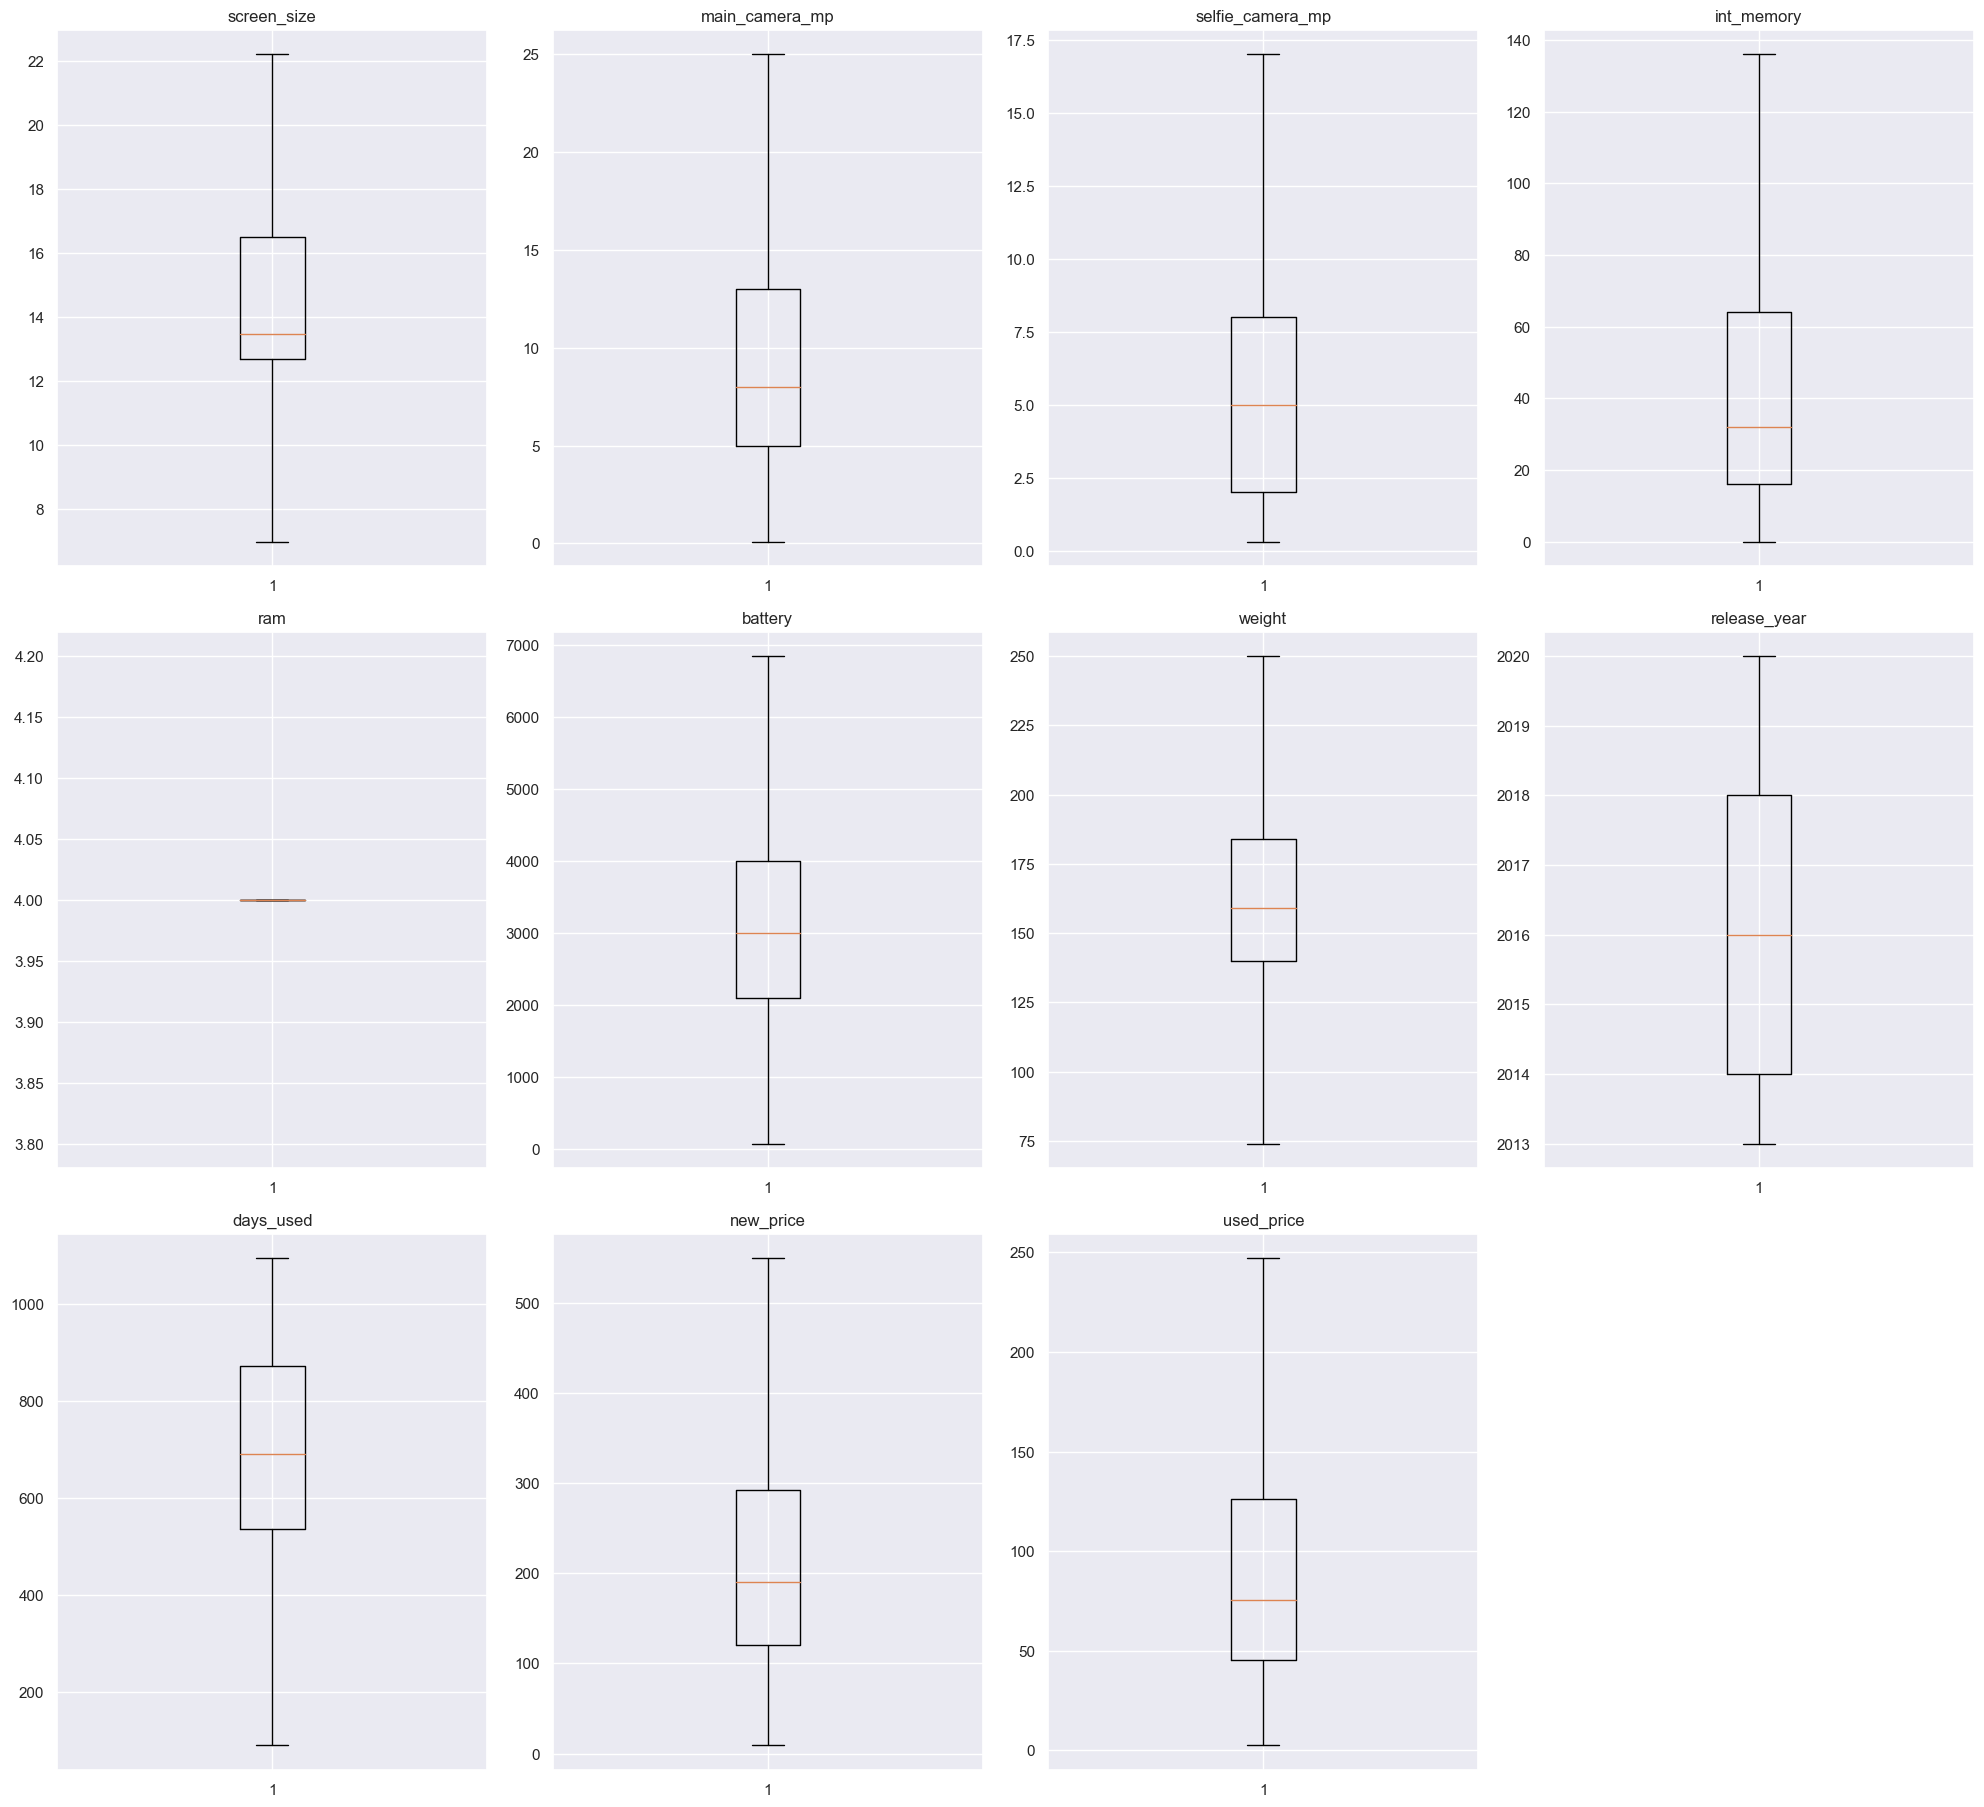

In [41]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

-   From the boxplots it can be seen that all the outliers have been
    treated.

## EDA

-   It is a good idea to explore the data once again after manipulating
    it.

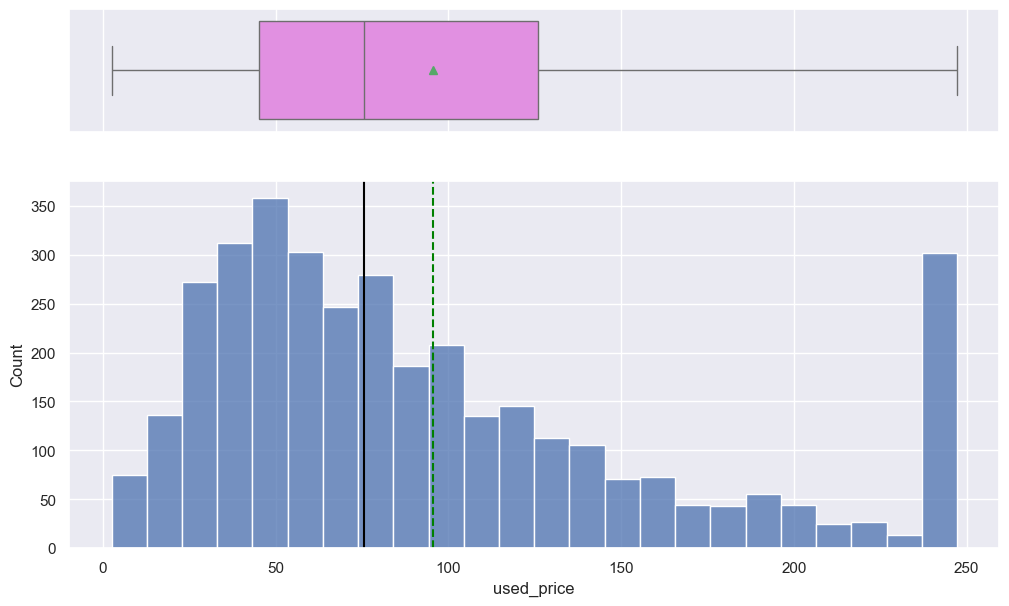

In [42]:
histogram_boxplot(df2, "used_price")

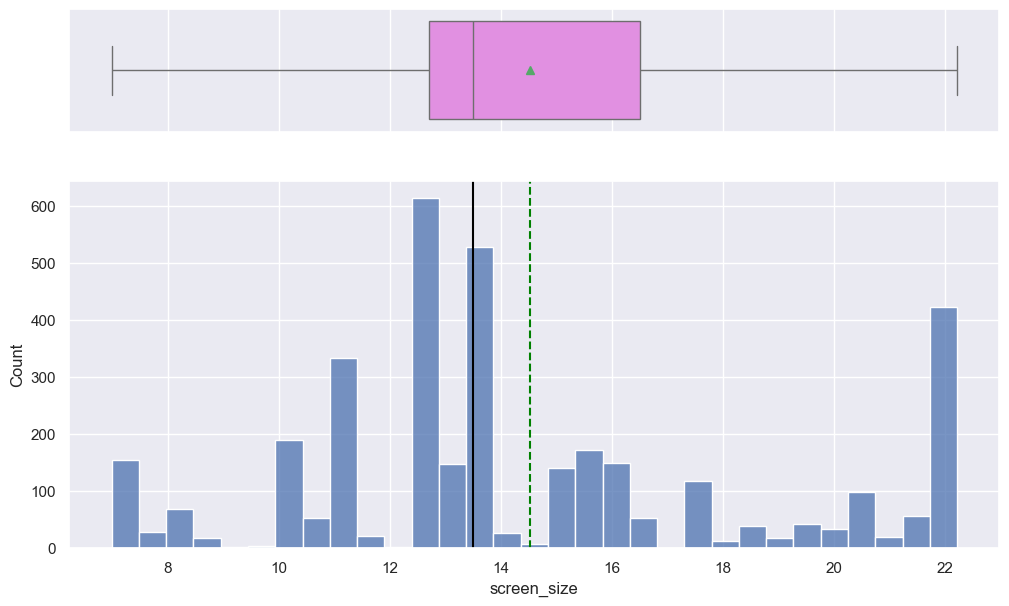

In [43]:
histogram_boxplot(df2, "screen_size")

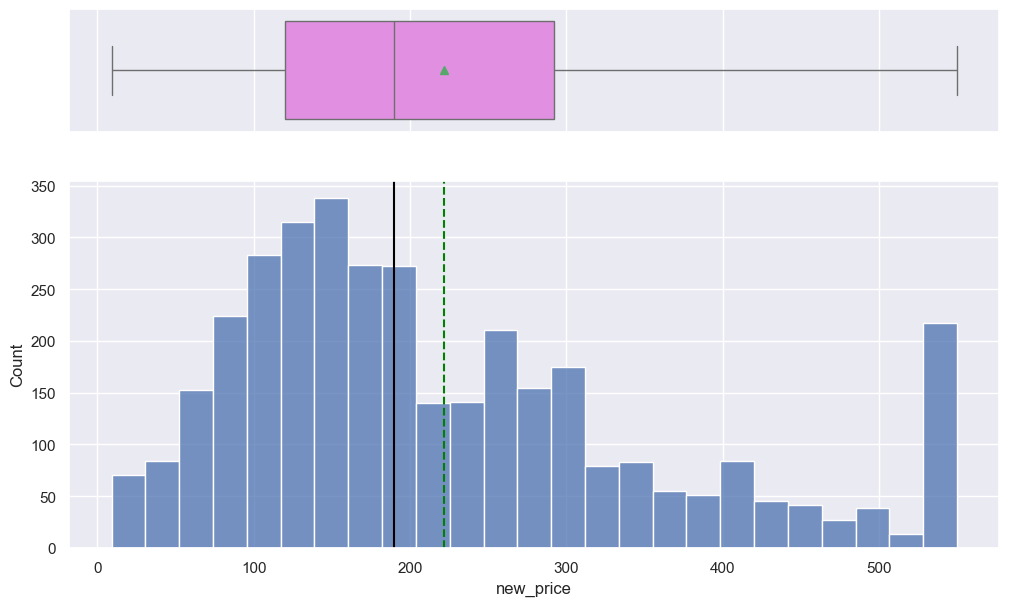

In [44]:
histogram_boxplot(df2, "new_price")

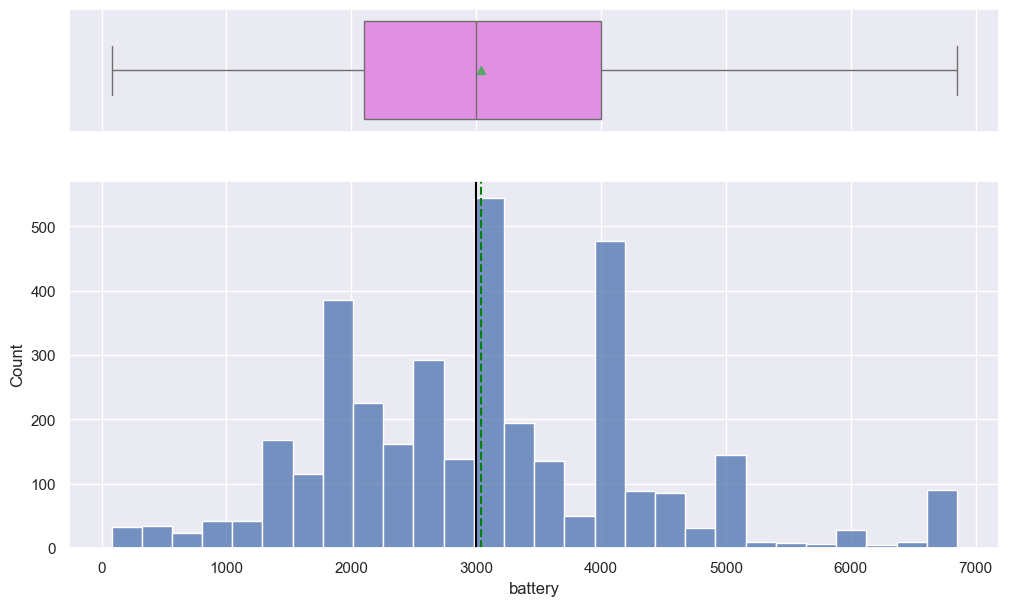

In [45]:
histogram_boxplot(df2, "battery")

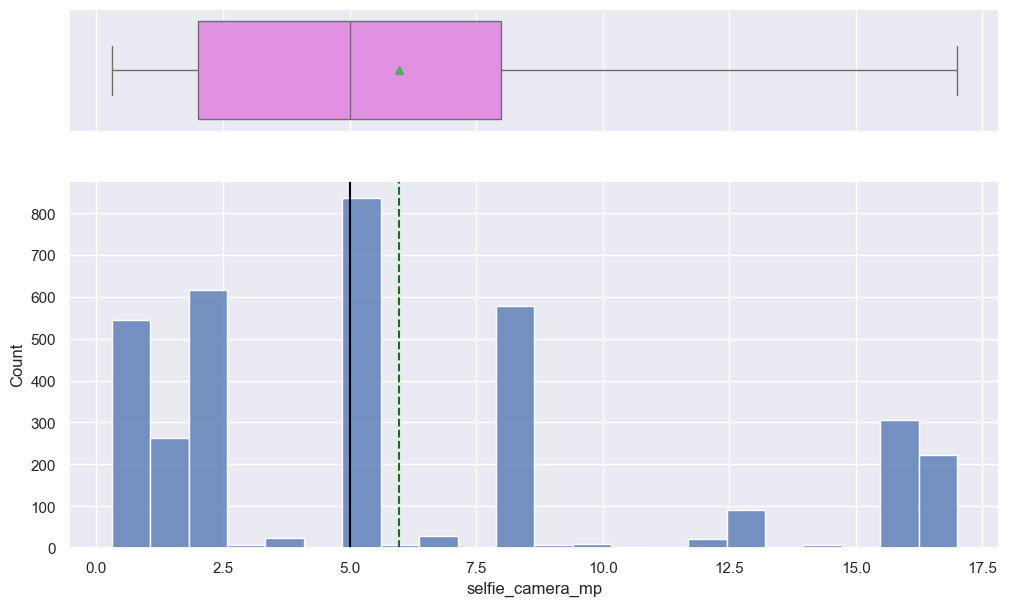

In [46]:
histogram_boxplot(df2, "selfie_camera_mp")

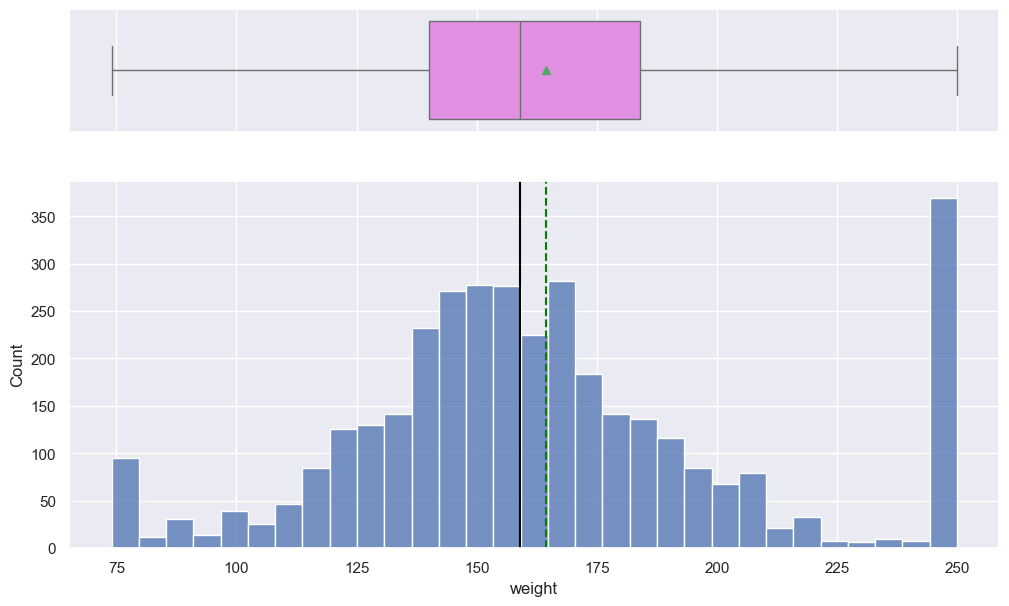

In [47]:
histogram_boxplot(df2, "weight")

-   After treating for outliers it can be seen that the distributions of
    the columns are less skewed than they were previously.

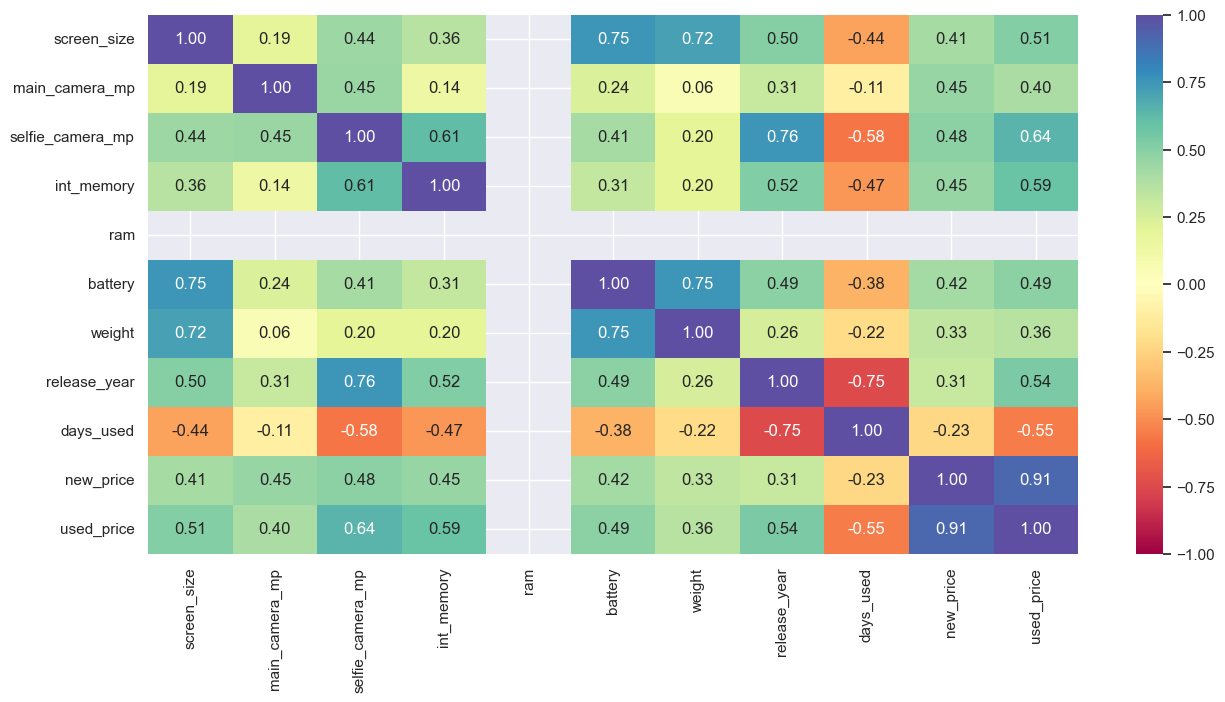

In [48]:
numeric_columns = df2.select_dtypes(include=np.number).columns.tolist()

# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df2[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

-   The correlation between the variables remain around the same value
    with new price being strongly positively correlated to used price
    while days used is strongly negatively correlated with the used
    price.

## Building a Linear Regression model

## Linear Model Building

1.  We want to predict the price of used phones.

2.  Before we proceed to build a model, we'll have to encode categorical
    features.

3.  We'll split the data into train and test to be able to evaluate the
    model that we build on the train data.

4.  We will build a Linear Regression model using the train data and
    then check it's performance.

In [49]:
# defining X and y variables
X = df2.drop(["used_price"], axis=1)
y = df2["used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android       22.225  yes   no            13.0   
1      Honor  Android       22.225  yes  yes            13.0   
2      Honor  Android       22.225  yes  yes            13.0   
3      Honor  Android       22.225  yes  yes            13.0   
4      Honor  Android       15.720  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  4.0   3020.0   146.0          2020   
1              16.0       128.0  4.0   4300.0   213.0          2020   
2               8.0       128.0  4.0   4200.0   213.0          2020   
3               8.0        64.0  4.0   6850.0   250.0          2020   
4               8.0        64.0  4.0   5000.0   185.0          2020   

   days_used  new_price  
0        127     111.62  
1        325     249.39  
2        162     359.47  
3        345     278.93  
4        293     140.87  
0     86.9600
1    161.4900
2   

In [50]:
X = pd.get_dummies(
        X,
        columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,22.225,13.0,5.0,64.0,4.0,3020.0,146.0,2020,127,111.62,...,False,False,False,False,False,False,False,False,True,False
1,22.225,13.0,16.0,128.0,4.0,4300.0,213.0,2020,325,249.39,...,False,False,False,False,False,False,False,False,True,True
2,22.225,13.0,8.0,128.0,4.0,4200.0,213.0,2020,162,359.47,...,False,False,False,False,False,False,False,False,True,True
3,22.225,13.0,8.0,64.0,4.0,6850.0,250.0,2020,345,278.93,...,False,False,False,False,False,False,False,False,True,True
4,15.720,13.0,8.0,64.0,4.0,5000.0,185.0,2020,293,140.87,...,False,False,False,False,False,False,False,False,True,False


In [51]:
X.shape

(3571, 48)

In [52]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [53]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2499
Number of rows in test data = 1072


In [54]:
# fitting the model on the train data (70% of the whole data)
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

In [55]:
coef_df = pd.DataFrame(
        np.append(linearregression.coef_, linearregression.intercept_),
        index=x_train.columns.tolist() + ["Intercept"],
        columns=["Coefficients"],
    )

coef_df


,Coefficients
screen_size,2.076879e-01
main_camera_mp,-2.742636e-01
selfie_camera_mp,8.380688e-01
int_memory,8.588868e-02
ram,-7.911644e-11
battery,1.355481e-04
weight,-1.226033e-02
release_year,-2.459011e-01
days_used,-8.460932e-02
new_price,3.844636e-01


In [56]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

In [57]:
# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


In [58]:
# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf


In [59]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,13.960441,10.222224,0.955136,0.954257,18.489055


In [60]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,13.74532,10.171443,0.957443,0.955446,16.417574


**Observations**

-   The training \$R^2\$ is 95.54%, indicating that the model explains
    95.54% of the variation in the train data. So, the model is not
    underfitting.

-   MAE and RMSE on the train and test sets are comparable, which shows
    that the model is not overfitting.

-   MAE indicates that our current model is able to predict used price
    within a mean error of 10.17 dollars on the test data.

-   MAPE on the test set suggests we can predict within 16.4% of the
    life expectancy.

## Model performance evaluation

**Let's check the performance of the model using different metrics.**

-   We will be using metric functions defined in sklearn for RMSE, MAE,
    and \$R^2\$.

-   We will define a function to calculate MAPE and adjusted \$R^2\$.

    -   The mean absolute percentage error (MAPE) measures the accuracy
        of predictions as a percentage, and can be calculated as the
        average absolute percent error for each predicted value minus
        actual values divided by actual values. It works best if there
        are no extreme values in the data and none of the actual values
        are 0.

-   We will create a function which will print out all the above metrics
    in one go.

In [61]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually

x_train1 = sm.add_constant(x_train)
x_train1 = x_train1.astype(float)

# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1110.
Date:                Mon, 21 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:43:34   Log-Likelihood:                -10134.
No. Observations:                2499   AIC:                         2.036e+04
Df Residuals:                    2451   BIC:                         2.064e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
screen_size               0.20

**Observations**

-   Negative values of the coefficient show that *used price* decreases
    with the increase of corresponding attribute value.

-   Positive values of the coefficient show that *used price* increases
    with the increase of corresponding attribute value.

-   p-value of a variable indicates if the variable is significant or
    not. If we consider the significance level to be 0.05 (5%), then any
    variable with a p-value less than 0.05 would be considered
    significant.

-   But these variables might contain multicollinearity, which will
    affect the p-values.

-   So, we need to deal with multicollinearity and check the other
    assumptions of linear regression first, and then look at the
    p-values.


## Checking Linear Regression Assumptions

-   In order to make statistical inferences from a linear regression
    model, it is important to ensure that the assumptions of linear
    regression are satisfied.

Checking for the following Linear Regression assumptions:

1.  **No Multicollinearity**

2.  **Linearity of variables**

3.  **Independence of error terms**

4.  **Normality of error terms**

5.  **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [63]:
checking_vif(x_train1)

,feature,VIF
0,screen_size,3.529005e+00
1,main_camera_mp,2.227816e+00
2,selfie_camera_mp,3.860192e+00
3,int_memory,2.187474e+00
4,ram,3.846732e+06
5,battery,3.730602e+00
6,weight,3.202294e+00
7,release_year,5.000190e+00
8,days_used,2.631834e+00
9,new_price,2.714314e+00


-   *ram*, *os_iOS* and *brand_name_Apple* have VIF significantly
    greater than 10.
-   Clearly these last 2 variables are correlated with each other.
-   This does seem to make intuitive sense because only Apple phones use
    the *ioS* operating system.

### Removing Multicollinearity

In [64]:
def treating_multicollinearity(predictors, target, high_vif_columns):
        """
        Checking the effect of dropping the columns showing high multicollinearity
        on model performance (adj. R-squared and RMSE)

        predictors: independent variables
        target: dependent variable
        high_vif_columns: columns having high VIF
        """
        # empty lists to store adj. R-squared and RMSE values
        adj_r2 = []
        rmse = []

        # build ols models by dropping one of the high VIF columns at a time
        # store the adjusted R-squared and RMSE in the lists defined previously
        for cols in high_vif_columns:
            # defining the new train set
            train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

            # create the model
            olsmodel = sm.OLS(target, train).fit()

            # adding adj. R-squared and RMSE to the lists
            adj_r2.append(olsmodel.rsquared_adj)
            rmse.append(np.sqrt(olsmodel.mse_resid))

        # creating a dataframe for the results
        temp = pd.DataFrame(
            {
                "col": high_vif_columns,
                "Adj. R-squared after_dropping col": adj_r2,
                "RMSE after dropping col": rmse,
            }
        ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
        temp.reset_index(drop=True, inplace=True)

        return temp


In [65]:
col_list = ["ram",
        "brand_name_Apple",
        "brand_name_Others",
        "os_iOS"
    ]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,ram,0.985090,14.096524
1,brand_name_Others,0.954293,14.093678
2,os_iOS,0.954251,14.100176
3,brand_name_Apple,0.954203,14.107624


In [66]:
col_to_drop = "ram"
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  ram


,feature,VIF
0,screen_size,45.381167
1,main_camera_mp,11.330202
2,selfie_camera_mp,7.161517
3,int_memory,5.038539
4,battery,24.796677
5,weight,54.633449
6,release_year,138.115143
7,days_used,16.170126
8,new_price,9.342501
9,brand_name_Alcatel,3.604879


In [67]:
col_list = [
        "screen_size",
        "main_camera_mp",
        "battery",
        "weight",
        "release_year",
        "days_used",
        "new_price",
        "brand_name_Apple",
        "brand_name_Others",
        "os_iOS"  
    ]

res = treating_multicollinearity(x_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Others,0.985096,14.093717
1,battery,0.985096,14.093757
2,weight,0.985092,14.096034
3,os_iOS,0.985083,14.100106
4,screen_size,0.985082,14.100381
5,brand_name_Apple,0.985068,14.107158
6,main_camera_mp,0.985041,14.119893
7,release_year,0.982990,15.056711
8,days_used,0.967933,20.673325
9,new_price,0.904301,35.713681


In [68]:
col_to_drop = "brand_name_Others"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif


VIF after dropping  brand_name_Others


,feature,VIF
0,screen_size,45.333983
1,main_camera_mp,11.329869
2,selfie_camera_mp,7.159296
3,int_memory,5.036775
4,battery,24.793622
5,weight,54.631967
6,release_year,66.402687
7,days_used,16.166059
8,new_price,9.341170
9,brand_name_Alcatel,1.228608


In [69]:
col_list = [
        "screen_size",
        "main_camera_mp",
        "battery",
        "weight",
        "release_year",
        "days_used",
        "new_price",
        "brand_name_Apple",
        "os_iOS"  
    ]

res = treating_multicollinearity(x_train3, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,battery,0.985102,14.090953
1,weight,0.985097,14.093224
2,os_iOS,0.985089,14.097296
3,screen_size,0.985088,14.097538
4,brand_name_Apple,0.985073,14.104652
5,main_camera_mp,0.985047,14.117068
6,release_year,0.980671,16.050193
7,days_used,0.967943,20.670047
8,new_price,0.904331,35.708103


In [70]:
col_to_drop = "battery"
x_train4 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)]
x_test4 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train4)
print("VIF after dropping ", col_to_drop)
vif


VIF after dropping  battery


,feature,VIF
0,screen_size,40.883497
1,main_camera_mp,11.303750
2,selfie_camera_mp,7.157808
3,int_memory,5.031460
4,weight,41.649170
5,release_year,64.185179
6,days_used,16.072779
7,new_price,9.305999
8,brand_name_Alcatel,1.225731
9,brand_name_Apple,20.451736


In [71]:
col_list = [
        "screen_size",
        "main_camera_mp",
        "weight",
        "release_year",
        "days_used",
        "new_price",
        "brand_name_Apple",
        "os_iOS"
    ]

res = treating_multicollinearity(x_train4, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight,0.985103,14.090588
1,os_iOS,0.985094,14.094649
2,screen_size,0.985091,14.096104
3,brand_name_Apple,0.985079,14.102105
4,main_camera_mp,0.985053,14.114200
5,release_year,0.980538,16.105474
6,days_used,0.967847,20.701062
7,new_price,0.904048,35.760900


In [72]:
col_to_drop = "weight"
x_train5 = x_train4.loc[:, ~x_train4.columns.str.startswith(col_to_drop)]
x_test5 = x_test4.loc[:, ~x_test4.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train5)
print("VIF after dropping ", col_to_drop)
vif


VIF after dropping  weight


,feature,VIF
0,screen_size,24.329947
1,main_camera_mp,10.970977
2,selfie_camera_mp,7.121971
3,int_memory,5.028102
4,release_year,57.911589
5,days_used,16.013880
6,new_price,8.967590
7,brand_name_Alcatel,1.223128
8,brand_name_Apple,20.440499
9,brand_name_Asus,1.247572


In [73]:
col_list = [
        "screen_size",
        "main_camera_mp",
        "release_year",
        "days_used",
        "new_price",
        "4g_yes"   
    ]

res = treating_multicollinearity(x_train5, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.985097,14.093315
1,main_camera_mp,0.985058,14.111838
2,4g_yes,0.985024,14.127951
3,release_year,0.980153,16.264021
4,days_used,0.967754,20.730789
5,new_price,0.901283,36.272477


In [74]:
col_to_drop = "screen_size"
x_train6 = x_train5.loc[:, ~x_train5.columns.str.startswith(col_to_drop)]
x_test6 = x_test5.loc[:, ~x_test5.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train6)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,main_camera_mp,10.685470
1,selfie_camera_mp,7.077773
2,int_memory,5.028026
3,release_year,29.796562
4,days_used,15.180105
5,new_price,8.562257
6,brand_name_Alcatel,1.223112
7,brand_name_Apple,20.287391
8,brand_name_Asus,1.244825
9,brand_name_BlackBerry,1.092789


In [75]:
col_list = [
        "main_camera_mp",
        "release_year",
        "days_used",
        "brand_name_Apple",
        "os_iOS"  
    ]

res = treating_multicollinearity(x_train6, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,os_iOS,0.985088,14.097850
1,brand_name_Apple,0.985071,14.105860
2,main_camera_mp,0.985043,14.119184
3,release_year,0.974808,18.323658
4,days_used,0.966584,21.103617


In [76]:
col_to_drop = "os_iOS"
x_train7 = x_train6.loc[:, ~x_train6.columns.str.startswith(col_to_drop)]
x_test7 = x_test6.loc[:, ~x_test6.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train7)
print("VIF after dropping ", col_to_drop)
vif


VIF after dropping  os_iOS


,feature,VIF
0,main_camera_mp,10.680212
1,selfie_camera_mp,7.056348
2,int_memory,5.025203
3,release_year,29.787373
4,days_used,15.128935
5,new_price,8.560664
6,brand_name_Alcatel,1.223104
7,brand_name_Apple,1.217664
8,brand_name_Asus,1.244825
9,brand_name_BlackBerry,1.091703


In [77]:
col_list = [
        "main_camera_mp",
        "release_year",
        "days_used"
    ]

res = treating_multicollinearity(x_train7, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,main_camera_mp,0.985034,14.123070
1,release_year,0.974785,18.331905
2,days_used,0.966457,21.143817


In [78]:
col_to_drop = "main_camera_mp"
x_train8 = x_train7.loc[:, ~x_train7.columns.str.startswith(col_to_drop)]
x_test8 = x_test7.loc[:, ~x_test7.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train8)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  main_camera_mp


,feature,VIF
0,selfie_camera_mp,6.440845
1,int_memory,4.866051
2,release_year,29.249769
3,days_used,14.806118
4,new_price,7.757464
5,brand_name_Alcatel,1.221817
6,brand_name_Apple,1.214734
7,brand_name_Asus,1.240488
8,brand_name_BlackBerry,1.091035
9,brand_name_Celkon,1.217979


In [79]:
col_list = ["release_year",
        "days_used"
    ]

res = treating_multicollinearity(x_train8, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,release_year,0.974760,18.34118
1,days_used,0.965689,21.38432


In [80]:
col_to_drop = "release_year"
x_train9 = x_train8.loc[:, ~x_train8.columns.str.startswith(col_to_drop)]
x_test9 = x_test8.loc[:, ~x_test8.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train9)
print("VIF after dropping ", col_to_drop)
vif


VIF after dropping  release_year


,feature,VIF
0,selfie_camera_mp,6.007149
1,int_memory,4.723456
2,days_used,5.166729
3,new_price,7.681395
4,brand_name_Alcatel,1.173095
5,brand_name_Apple,1.201318
6,brand_name_Asus,1.202843
7,brand_name_BlackBerry,1.087891
8,brand_name_Celkon,1.212895
9,brand_name_Coolpad,1.053205


In [81]:
olsmod1 = sm.OLS(y_train, x_train9).fit()
print(olsmod1.summary())


                                 OLS Regression Results                                
Dep. Variable:             used_price   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              2414.
Date:                Mon, 21 Oct 2024   Prob (F-statistic):                        0.00
Time:                        17:43:41   Log-Likelihood:                         -10796.
No. Observations:                2499   AIC:                                  2.167e+04
Df Residuals:                    2459   BIC:                                  2.190e+04
Df Model:                          40                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

**Observations**

-   We can see that adj. R-squared did not drop which shows that the
    dropped columns did not have much effect on the model.
-   As there is no multicollinearity, we can look at the p-values of
    predictor variables to check their significance.
    
<!-- -->

-   *brand_name_Celkon*, *brand_name_Gionee*, *brand_name_Infinix*,
    *brand_name_Meizu*, *brand_name_Microsoft*, and *os_Windows* have
    p-value \> 0.05. So, they are not significant and we'll drop them.
-   But sometimes p-values change after dropping a variable. So, we'll
    not drop all variables at once.
-   Instead, we will do the following:
    -   Build a model, check the p-values of the variables, and drop the
        column with the highest p-value.
    -   Create a new model without the dropped feature, check the
        p-values of the variables, and drop the column with the highest
        p-value.
    -   Repeat the above two steps till there are no columns with
        p-value \> 0.05.

The above process can also be done manually by picking one variable at a
time that has a high p-value, dropping it, and building a model again.
But that might be a little tedious and using a loop will be more
efficient.

In [82]:
# initial list of columns
cols = x_train9.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train9[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['selfie_camera_mp', 'int_memory', 'days_used', 'new_price', 'brand_name_Alcatel', 'brand_name_Apple', 'brand_name_Asus', 'brand_name_BlackBerry', 'brand_name_Coolpad', 'brand_name_Google', 'brand_name_HTC', 'brand_name_Honor', 'brand_name_Huawei', 'brand_name_Karbonn', 'brand_name_LG', 'brand_name_Lava', 'brand_name_Lenovo', 'brand_name_Micromax', 'brand_name_Motorola', 'brand_name_Nokia', 'brand_name_OnePlus', 'brand_name_Panasonic', 'brand_name_Realme', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Spice', 'brand_name_Vivo', 'brand_name_XOLO', 'brand_name_Xiaomi', 'brand_name_ZTE', 'os_Others', '4g_yes', '5g_yes']


In [83]:
x_train10 = x_train9[selected_features]
x_test10 = x_test9[selected_features]

In [84]:
olsmod2 = sm.OLS(y_train, x_train10).fit()
print(olsmod2.summary())

                                 OLS Regression Results                                
Dep. Variable:             used_price   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              2913.
Date:                Mon, 21 Oct 2024   Prob (F-statistic):                        0.00
Time:                        17:43:41   Log-Likelihood:                         -10804.
No. Observations:                2499   AIC:                                  2.167e+04
Df Residuals:                    2466   BIC:                                  2.187e+04
Df Model:                          33                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

**Now no feature has p-value greater than 0.05, so we'll consider the
features in *x_train10* as the final ones and *olsmod2* as final
model.**

**Observations**

-   Now adjusted R-squared is 0.975, i.e., our model is able to explain
    \~97% of the variance. This shows that the model is good.
-   The adjusted R-squared in *olsmod0* (where we considered all the
    variables) was 0.975. This shows that the variables we dropped were
    not affecting the model much.

**Now we'll check the rest of the assumptions on *olsmod2*.**

1.  **Linearity of variables**

2.  **Independence of error terms**

3.  **Normality of error terms**

4.  **No Heteroscedasticity**


### TEST FOR LINEARITY AND INDEPENDENCE

In [85]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()


,Actual Values,Fitted Values,Residuals
844,100.48,91.699579,8.780421
1539,111.68,110.102742,1.577258
3452,113.89,106.566581,7.323419
1727,64.09,69.355552,-5.265552
1926,67.95,64.450499,3.499501


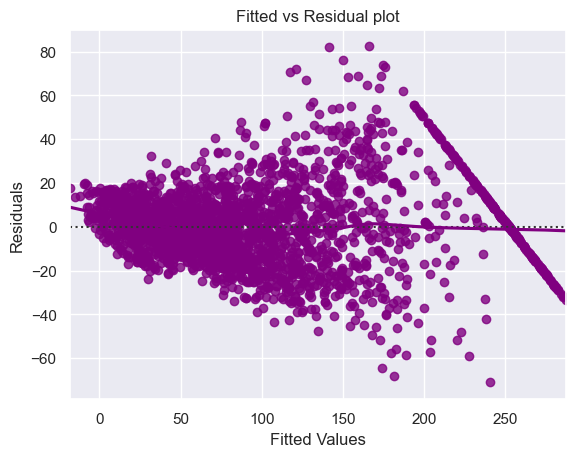

In [86]:
# let's plot the fitted values vs residuals

try:

    sns.residplot(
        data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
    )
    plt.xlabel("Fitted Values")
    plt.ylabel("Residuals")
    plt.title("Fitted vs Residual plot")
    plt.show()
    
except RuntimeError as e:
    pass
    

-   The scatter plot shows the distribution of residuals (errors) vs
fitted values (predicted values).

-   If there exist any pattern in this plot, we consider it as signs of
non-linearity in the data and a pattern means that the model doesn't
capture non-linear effects.

-   We see no pattern in the plot above. Hence, the assumptions of
linearity and independence are satisfied.

### TEST FOR NORMALITY

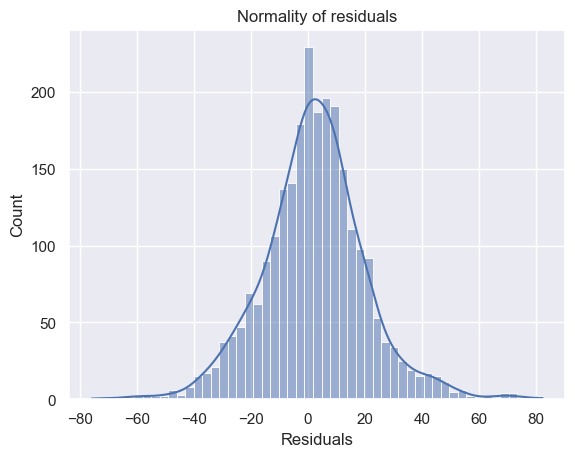

In [87]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

-   The histogram of residuals does have a bell shape.
-   Let's check the Q-Q plot.

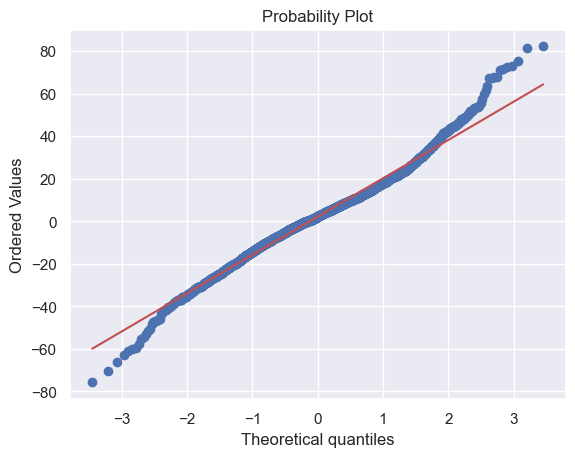

In [88]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()


-   The residuals more or less follow a straight line except for the
    tails.
-   Let's check the results of the Shapiro-Wilk test.


In [89]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9843482375144958, pvalue=5.772309306971771e-16)

-   Since p-value \< 0.05, the residuals are not normal as per the
    Shapiro-Wilk test.
-   Strictly speaking, the residuals are not normal.
-   However, as an approximation, we can accept this distribution as
    close to being normal.
-   The assumption is satisfied.

### TEST FOR HOMOSCEDASTICITY

In [90]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train10)
lzip(name, test)

[('F statistic', 0.9727347226066302), ('p-value', 0.6850867002411113)]

**Since p-value \> 0.05, we can say that the residuals are
homoscedastic. So, this assumption is satisfied.**

**Now that we have checked all the assumptions of linear regression and
they are satisfied, we can move towards the prediction part.**

In [91]:
# predictions on the test set
pred = olsmod2.predict(x_test10)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
2098,30.5200,27.043442
278,195.6700,202.413556
26,247.1925,214.811914
2910,89.9700,66.96058
2631,69.2000,76.996963
1582,89.5800,116.410241
2110,247.1925,267.868767
3160,65.3400,53.207511
2817,115.7700,112.153108
549,39.2900,33.413458


-   We can observe here that our model has returned pretty good
    prediction results, and the actual and predicted values are
    comparable.

-   We can also visualize comparison result as a bar graph.

**Note**: As the number of records is large, for representation purpose,
we are taking a sample of 25 records only.

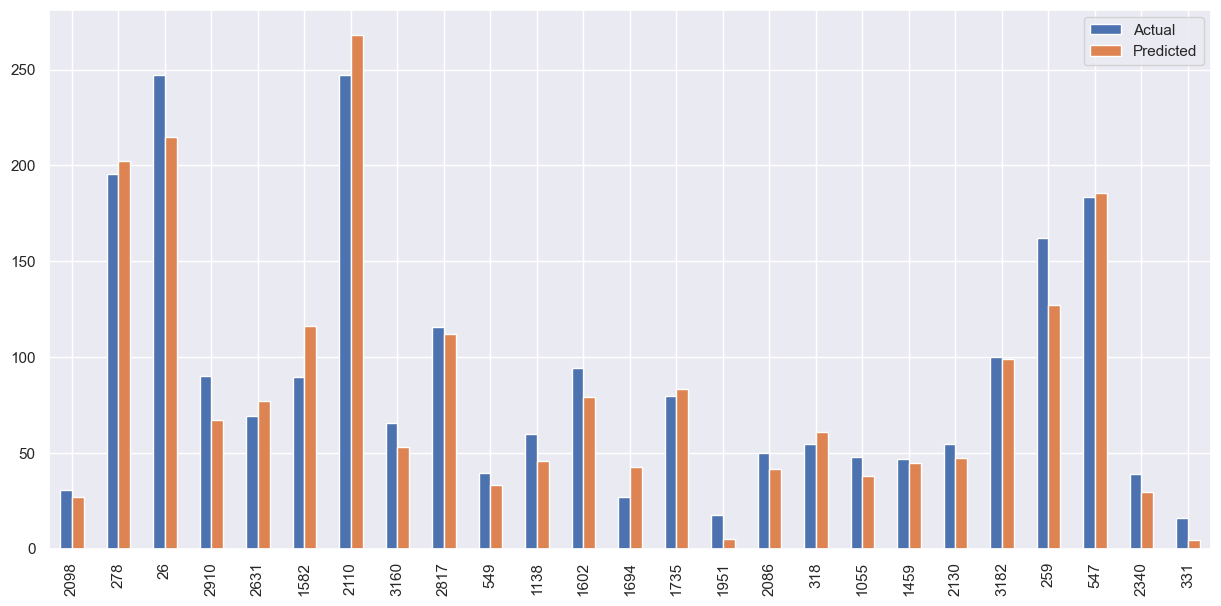

In [92]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

In [93]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train10, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,18.256955,13.665708,0.923271,0.922244,20.173183


In [94]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test10, y_test)
olsmod2_test_perf


Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,18.013348,13.46315,0.926911,0.924587,18.440023


-   The model is able to explain \~92% of the variation in the data,
    which is very good.

-   The train and test RMSE and MAE are low and comparable. So, our
    model is not suffering from overfitting.

-   The MAPE on the test set suggests we can predict within 18.44% of
    the used price.

-   Hence, we can conclude the model *olsmod2* is good for prediction as
    well as inference purposes.

**Let's compare the initial model created with sklearn and the final
statsmodels model.**


In [95]:
# training performance comparison

models_train_comp_df = pd.concat(
    [linearregression_train_perf.T, olsmod2_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df


Training performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,13.960441,18.256955
MAE,10.222224,13.665708
R-squared,0.955136,0.923271
Adj. R-squared,0.954257,0.922244
MAPE,18.489055,20.173183


In [96]:
# test performance comparison

models_test_comp_df = pd.concat(
    [linearregression_test_perf.T, olsmod2_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Test performance comparison:")
models_test_comp_df


Test performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,13.745320,18.013348
MAE,10.171443,13.463150
R-squared,0.957443,0.926911
Adj. R-squared,0.955446,0.924587
MAPE,16.417574,18.440023


-   The performance of the two models is close to each other.

In [97]:
olsmodel_final = sm.OLS(y_train, x_train10).fit()
print(olsmodel_final.summary())


                                 OLS Regression Results                                
Dep. Variable:             used_price   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              2913.
Date:                Mon, 21 Oct 2024   Prob (F-statistic):                        0.00
Time:                        17:43:44   Log-Likelihood:                         -10804.
No. Observations:                2499   AIC:                                  2.167e+04
Df Residuals:                    2466   BIC:                                  2.187e+04
Df Model:                          33                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

## Final Model Summary


## Conclusions

1.  *days_used* and *brand_name_OnePlus*) come out to be very
    significant, as expected. As these two increase, the used price of
    the phone decreases, as is visible in the negative coefficient sign.

2.  Both *4g* and *5g* capability increase the price of used phones.

## Actionable Insights and Recommendations

-   We need more data on phones with high ram storage and battery
    capacity to further improve our model.
-   Right no they're seen as outliers in this dataset and we do not have
    enough data to make accurate prediction on phones which belong in
    that category.
-   Phones with higher ram value, 4g capability and a low amount of days
    used have higher values compared to phones without.